<a href="https://colab.research.google.com/github/Navneet2409/credit-card-default-prediction/blob/main/Credit_Card_Notebook_Navneet_Keshri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Credit Card Default Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


## **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**

Despite high returns, credit cards carry significant risks. The ever-expanding number of credit cards has achieved an expansion in how much credit card defaults and the subsequent enormous measure of bills and repayment data information have likewise carried specific hardships to the risk controllers. As a result, one of the primary concerns of banks is how to use the data generated by users and extract useful information to control risks, reduce the default rate, and control the growth of non-performing assets.

A credit card issuer based in Taiwan wants to learn more about how likely its customers are to default on their payments and the main factors that influence this probability. The issuer's decisions regarding who to issue a credit card to and what credit limit to offer would be informed by this information. The issuer's future strategy, including plans to offer targeted credit products to their customers, would be informed by a better understanding of their current and potential customers as a result of this.

**Our objective**
* To determine the main factors that influence the likelihood of defaulting on a credit card.
* To determine the likelihood that Bank customers will default on their credit card payments.


## ***Let's Begin !***

## ***1. Know Your Data***

#### Import Libraries

In [ ]:
# Import Libraries and modules
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
from scipy.stats import *

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from xgboost import XGBRFClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer


import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score

import warnings
warnings.filterwarnings("ignore")

#### Dataset Loading

In [ ]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the Default of Credit Card Clients data set from the drive
clients_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Docs/Credit Card Default Prediction - Navneet Keshri/default of credit card clients.csv',header = 1)

#### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
clients_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns 
clients_df.shape

(30000, 25)

#### Dataset Information

In [ ]:
# Dataset Info
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

We have 25 columns. All of them are numerical (int64 data type)

#### Duplicate Values

What is the significance of eliminating duplicate records from my data?

The mere presence of repeated data in the dataset is referred to as "duplication." This could be caused by incorrect data entry or data collection procedures. We can save time and money by not sending the same data to the machine learning model multiple times by removing duplicate data from our set.

In [ ]:
# Checking Duplicate Values
value=len(clients_df[clients_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


After counting duplicate values in the above data, we discovered that none is present.

#### Missing Values/Null Values

Why is it necessary to deal with missing values

There are frequently a lot of missing values in the actual data. Data corruption or failure to record data are potential causes of missing values. During the preprocessing of the dataset, the handling of missing data is very important because many machine learning algorithms do not support missing values. Because of this, we first check for missing values.

In [ ]:
# Missing Values/Null Values Count
print(clients_df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


From the above commands, we noticed that every column has 0 number of rows null values. This seems to be clean data and there is no missing data in any of the 'rows and columns'.

#### What did you know about your dataset?

The dataset given is a dataset from Banking industry, and we have to analysis the credit default of customers and the insights behind it.

Predicting customer loan default is a job of proactively identifying customers most likely to default on loan payments. Typically, this is accomplished by dynamically analyzing relevant customer data and actions.

In the dataset we have 30000 number of rows and 25 columns. There are no mising values and duplicate values in the dataset.




## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
clients_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Dataset Describe
clients_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


####  Variables Description

In [ ]:
clients_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


* **ID	:** ID of each client
* **LIMIT_BAL	:** Amount of given credit in NT dollars 
* **SEX	:** Gender (1=male, 2=female)
* **EDUCATION	:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE	:** Marital status (1=married, 2=single, 3=others)
* **AGE	:** Age in years
* **PAY_0	:** Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2	:** Repayment status in August, 2005 (scale same as above)
* **PAY_3	:** Repayment status in July, 2005 (scale same as above)
* **PAY_4	:** Repayment status in June, 2005 (scale same as above)
* **PAY_5	:** Repayment status in May, 2005 (scale same as above)
* **PAY_6	:** Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1	:** Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2	:** Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3	:** Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4	:** Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5	:** Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6	:** Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1	:** Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2	:** Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3	:** Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4	:** Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5	:** Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6	:** Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month	:** Default payment (1=yes, 0=no)

#### Check Unique Values for each variable.

In [ ]:
# print the unique value
clients_df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [ ]:
# Check Unique Values for each variable.
for i in clients_df.columns.tolist():
  print("No. of unique values in ",i,"is",clients_df[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

##***3. EDA and Data Wrangling***

#### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df = clients_df.copy()

#### Renaming some columns 

In [ ]:
# Changing inconsistent column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DP_NEXT_MONTH'
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'DP_NEXT_MONTH'},inplace = True)
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

#### Categorical data conversion

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ID             30000 non-null  int64
 1   LIMIT_BAL      30000 non-null  int64
 2   SEX            30000 non-null  int64
 3   EDUCATION      30000 non-null  int64
 4   MARRIAGE       30000 non-null  int64
 5   AGE            30000 non-null  int64
 6   PAY_1          30000 non-null  int64
 7   PAY_2          30000 non-null  int64
 8   PAY_3          30000 non-null  int64
 9   PAY_4          30000 non-null  int64
 10  PAY_5          30000 non-null  int64
 11  PAY_6          30000 non-null  int64
 12  BILL_AMT1      30000 non-null  int64
 13  BILL_AMT2      30000 non-null  int64
 14  BILL_AMT3      30000 non-null  int64
 15  BILL_AMT4      30000 non-null  int64
 16  BILL_AMT5      30000 non-null  int64
 17  BILL_AMT6      30000 non-null  int64
 18  PAY_AMT1       30000 non-null  int64
 19  PAY_

Although they appear to be of the integer type, 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'SEX', 'EDUCATION', 'MARRIAGE' and 'DP_NEXT_MONTH' columns are actually of the category type. As a result, if we do not alter this data structure, we run the risk of being deceived by the values during subsequent analyses.

Age is a integer data type not a categorical data type,

In [ ]:
# Change the int64 column into catagory column
cols=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for col in cols:
  df[col]= df[col].astype('category')

In [ ]:
# let's check the result of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   ID             30000 non-null  int64   
 1   LIMIT_BAL      30000 non-null  int64   
 2   SEX            30000 non-null  category
 3   EDUCATION      30000 non-null  category
 4   MARRIAGE       30000 non-null  category
 5   AGE            30000 non-null  int64   
 6   PAY_1          30000 non-null  category
 7   PAY_2          30000 non-null  category
 8   PAY_3          30000 non-null  category
 9   PAY_4          30000 non-null  category
 10  PAY_5          30000 non-null  category
 11  PAY_6          30000 non-null  category
 12  BILL_AMT1      30000 non-null  int64   
 13  BILL_AMT2      30000 non-null  int64   
 14  BILL_AMT3      30000 non-null  int64   
 15  BILL_AMT4      30000 non-null  int64   
 16  BILL_AMT5      30000 non-null  int64   
 17  BILL_AMT6      30000 non-null  

#### Checking our dependent variable

In [ ]:
# 'DP_NEXT_MONTH' is the dependent variable.
# It is a binary variable, that should take only two values (Yes = 1, No = 0).

df['DP_NEXT_MONTH'].value_counts()

0    23364
1     6636
Name: DP_NEXT_MONTH, dtype: int64

Most of the data is 'DP_NEXT_MONTH' = 0 (do not default next month)

The column may need to be rebalanced.

#### Checking categorical columns


In [ ]:
# 1. 'SEX'
# Gender (1 = male; 2 = female)
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

No data wrangling is needed for column 'SEX'

In [ ]:
# 2. 'EDUCATION'
# Education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

'EDUCATION' column has 4 = others, 5= unknown, 6 =unknown and 0 = unknown value we need to group all unknow into 4 = Others

In [ ]:
def reassign_edu(x):
  accepted_values = [1,2,3,4]
  if x in accepted_values:
    output = x
  else:
    output = 4
  return output

In [ ]:
df['EDUCATION'] = df['EDUCATION'].apply(reassign_edu)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Now this seems good and 'EDUCATION' data has been wrangled.

In [ ]:
# 3. 'MARRIAGE'
# Marital status (1 = married; 2 = single; 3 = divorce; 0=others).
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

No data wrangling is needed for column 'MARRIAGE'

'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', and 'PAY_6' are described as follows: 

(-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [ ]:
# 4. 'PAY_1'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_1'].value_counts()

0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: PAY_1, dtype: int64

No data wrangling is needed for 'PAY_1'.

In [ ]:
# 5. 'PAY_2'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_2'].value_counts()

0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: PAY_2, dtype: int64

No data wrangling is needed for 'PAY_2'

In [ ]:
# 6. 'PAY_3'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_3'].value_counts()

0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: PAY_3, dtype: int64

No data wrangling is needed for 'PAY_3'

In [ ]:
# 7. 'PAY_4'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_4'].value_counts()

0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: PAY_4, dtype: int64

No data wrangling is needed for 'PAY_4'

In [ ]:
# 8. 'PAY_5'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_5'].value_counts()

0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: PAY_5, dtype: int64

No data wrangling is needed for 'PAY_5'

In [ ]:
# 9. 'PAY_6'
# (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 
# 8=payment delay for eight months, 9=payment delay for nine months and above)
df['PAY_6'].value_counts()

0     16286
-1     5740
-2     4895
2      2766
3       184
4        49
7        46
6        19
5        13
8         2
Name: PAY_6, dtype: int64

No data wrangling is needed for 'PAY_6'

#### Checking Numerical columns


Creating a function to understand numerical columns

In [ ]:
def inspect_num_column(input_series=None):
  ''' Takes pandas series as input to inspect and give summary plot and summary statistics'''

  # Display boxplot and histogram/kde.
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
  sns.boxplot(x=input_series, ax=ax1)
  sns.distplot(input_series, ax=ax2)

  ax1.set_title(input_series.name)
  plt.show()

  # Print summary statistics.
  print('Min: \t\t\t {:,.0f}'.format(input_series.min()))
  print('Lower Quartile: \t {:,.0f}'.format(input_series.quantile([.25]).iloc[0]))
  print('median: \t\t {:,.0f}'.format(input_series.median()))
  print('mean: \t\t\t {:,.0f}'.format(input_series.mean()))
  print('Upper Quartile: \t {:,.0f}'.format(input_series.quantile([.75]).iloc[0]))                                    
  print('max: \t\t\t {:,.0f}'.format(input_series.max()))
  print('\n')
  print('Skew: \t\t\t {:,.2f}'.format(input_series.skew()))
  print('Kurtosis: \t\t {:,.2f}'.format(input_series.kurtosis()))

  return None

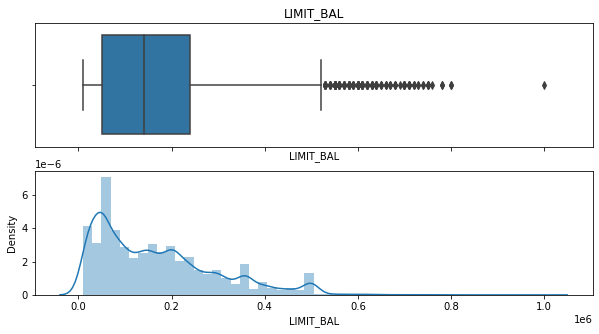

Min: 			 10,000
Lower Quartile: 	 50,000
median: 		 140,000
mean: 			 167,484
Upper Quartile: 	 240,000
max: 			 1,000,000


Skew: 			 0.99
Kurtosis: 		 0.54


In [ ]:
# 1. 'LIMIT_BAL'
# Amount of the given credit (NT dollar)
input_series = df['LIMIT_BAL']
inspect_num_column(input_series)

The column may need to be rebalanced.

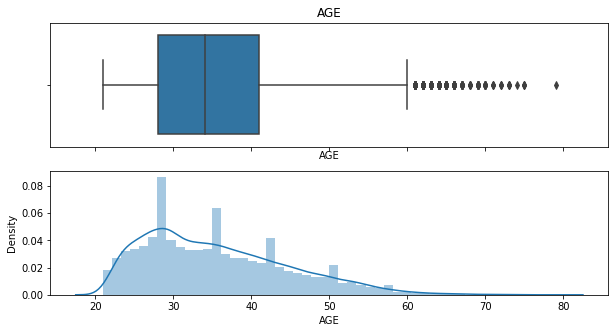

Min: 			 21
Lower Quartile: 	 28
median: 		 34
mean: 			 35
Upper Quartile: 	 41
max: 			 79


Skew: 			 0.73
Kurtosis: 		 0.04


In [ ]:
# 2. 'AGE'
# Amount of the given credit (NT dollar)
input_series = df['AGE']
inspect_num_column(input_series)

No data wrangling is needed for 'AGE'

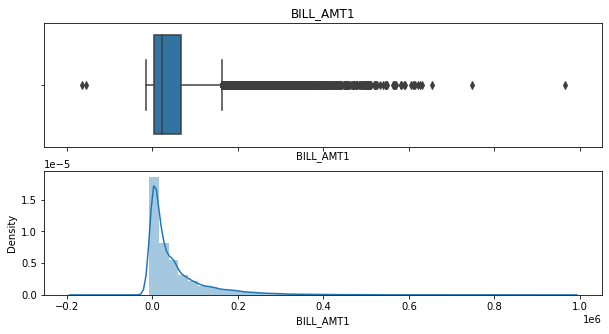

Min: 			 -165,580
Lower Quartile: 	 3,559
median: 		 22,382
mean: 			 51,223
Upper Quartile: 	 67,091
max: 			 964,511


Skew: 			 2.66
Kurtosis: 		 9.81


In [ ]:
# 3. 'BILL_AMT1'
# Amount of bill statement in September, 2005 (NT dollar)
input_series = df['BILL_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

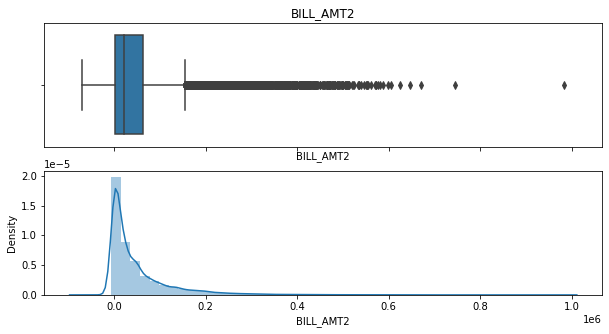

Min: 			 -69,777
Lower Quartile: 	 2,985
median: 		 21,200
mean: 			 49,179
Upper Quartile: 	 64,006
max: 			 983,931


Skew: 			 2.71
Kurtosis: 		 10.30


In [ ]:
# 4. 'BILL_AMT2'
# Amount of bill statement in August, 2005 (NT dollar)
input_series = df['BILL_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

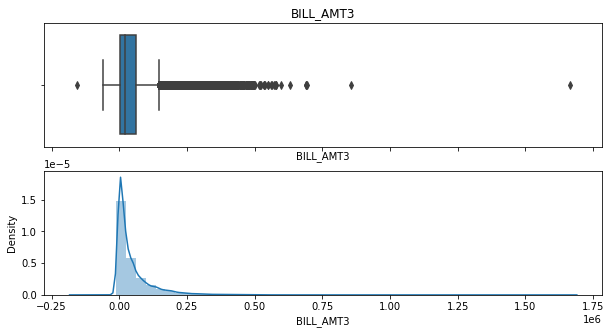

Min: 			 -157,264
Lower Quartile: 	 2,666
median: 		 20,088
mean: 			 47,013
Upper Quartile: 	 60,165
max: 			 1,664,089


Skew: 			 3.09
Kurtosis: 		 19.78


In [ ]:
# 5. 'BILL_AMT3'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

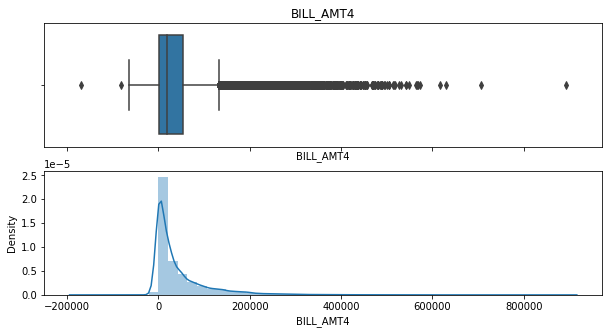

Min: 			 -170,000
Lower Quartile: 	 2,327
median: 		 19,052
mean: 			 43,263
Upper Quartile: 	 54,506
max: 			 891,586


Skew: 			 2.82
Kurtosis: 		 11.31


In [ ]:
# 6. 'BILL_AMT4'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

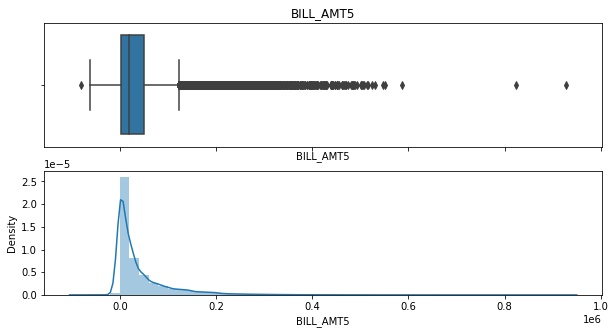

Min: 			 -81,334
Lower Quartile: 	 1,763
median: 		 18,104
mean: 			 40,311
Upper Quartile: 	 50,190
max: 			 927,171


Skew: 			 2.88
Kurtosis: 		 12.31


In [ ]:
# 7. 'BILL_AMT5'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

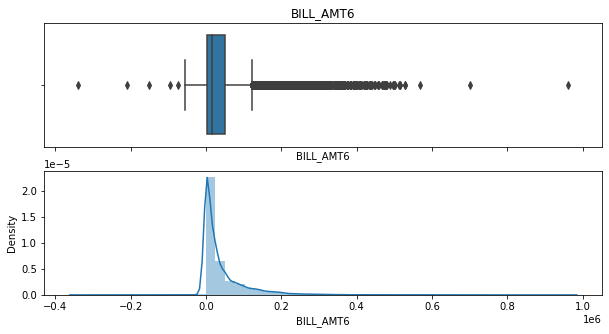

Min: 			 -339,603
Lower Quartile: 	 1,256
median: 		 17,071
mean: 			 38,872
Upper Quartile: 	 49,198
max: 			 961,664


Skew: 			 2.85
Kurtosis: 		 12.27


In [ ]:
# 8. 'BILL_AMT6'
# Amount of bill statement in July, 2005 (NT dollar)
input_series = df['BILL_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

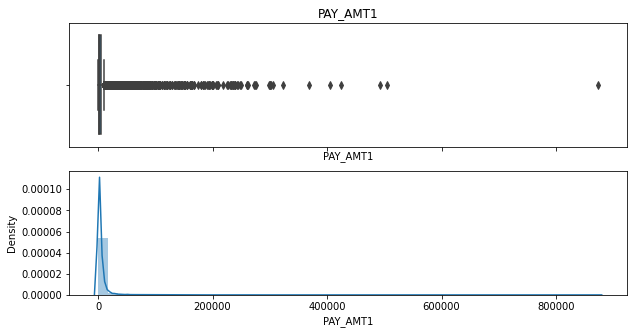

Min: 			 0
Lower Quartile: 	 1,000
median: 		 2,100
mean: 			 5,664
Upper Quartile: 	 5,006
max: 			 873,552


Skew: 			 14.67
Kurtosis: 		 415.25


In [ ]:
# 9. 'PAY_AMT1'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT1']
inspect_num_column(input_series)

The column may need to be rebalanced.

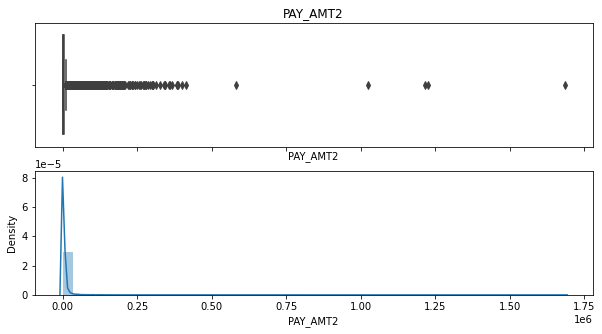

Min: 			 0
Lower Quartile: 	 833
median: 		 2,009
mean: 			 5,921
Upper Quartile: 	 5,000
max: 			 1,684,259


Skew: 			 30.45
Kurtosis: 		 1,641.63


In [ ]:
# 10. 'PAY_AMT2'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT2']
inspect_num_column(input_series)

The column may need to be rebalanced.

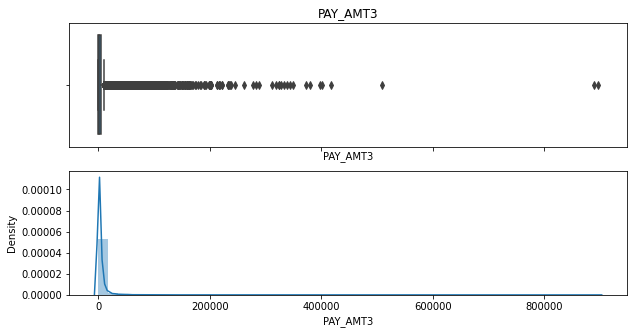

Min: 			 0
Lower Quartile: 	 390
median: 		 1,800
mean: 			 5,226
Upper Quartile: 	 4,505
max: 			 896,040


Skew: 			 17.22
Kurtosis: 		 564.31


In [ ]:
# 11. 'PAY_AMT3'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT3']
inspect_num_column(input_series)

The column may need to be rebalanced.

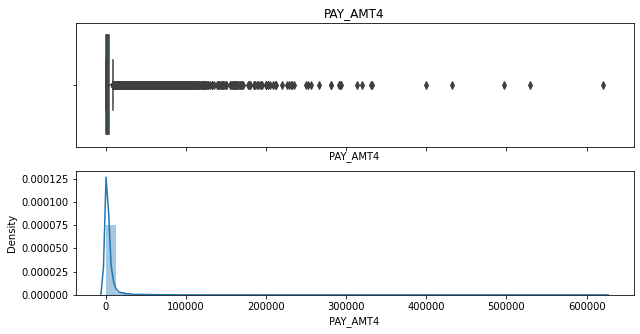

Min: 			 0
Lower Quartile: 	 296
median: 		 1,500
mean: 			 4,826
Upper Quartile: 	 4,013
max: 			 621,000


Skew: 			 12.90
Kurtosis: 		 277.33


In [ ]:
# 12. 'PAY_AMT4'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT4']
inspect_num_column(input_series)

The column may need to be rebalanced.

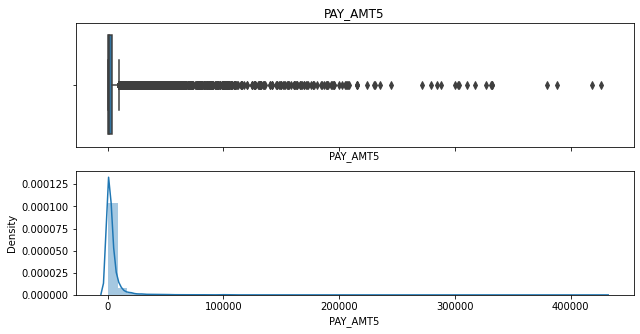

Min: 			 0
Lower Quartile: 	 252
median: 		 1,500
mean: 			 4,799
Upper Quartile: 	 4,032
max: 			 426,529


Skew: 			 11.13
Kurtosis: 		 180.06


In [ ]:
# 13. 'PAY_AMT5'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT5']
inspect_num_column(input_series)

The column may need to be rebalanced.

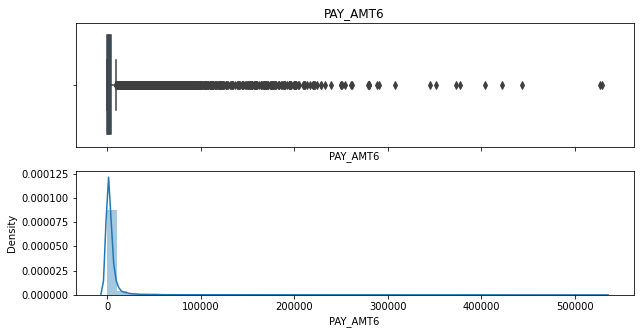

Min: 			 0
Lower Quartile: 	 118
median: 		 1,500
mean: 			 5,216
Upper Quartile: 	 4,000
max: 			 528,666


Skew: 			 10.64
Kurtosis: 		 167.16


In [ ]:
# 14. 'PAY_AMT6'
# Amount of previous payment in September, 2005 (NT dollar)
input_series = df['PAY_AMT6']
inspect_num_column(input_series)

The column may need to be rebalanced.

#### Manipulations done and insights found

* We did some basic data manipulations and renamed complex column names after copying the original dataset. 
* We changed the data type of the variables and converted a few variables into categorical columns which are necessary for the model to understand. 
* We checked our dependent variable and finds out that the dependent variable may need to be rebalanced.
* We checked all categorical variables and from that 'EDUCATION' column values has been reassigned.
* We checked all numerical variables and finds out that almost every numerical column has a lot of outliers which we will remove before feature engineering.

## **4. Data Visualization: Understand the relationships between variables**

Since 'DP_NEXT_MONTH' is our dependent variable, we need to use a visualization plot to compare this column to the other columns. Before moving on to the other columns, we first examine the category data type.

Let us see how 'DP_NEXT_MONTH' = number of credit defaulters varies across different categories 

#### **Chart 1 - Pie Chart on Dependant Variable i.e., DP_NEXT_MONTH (Univariate Analysis)**

0    23364
1     6636
Name: DP_NEXT_MONTH, dtype: int64
 


Text(0.5, 1.0, 'Percentage of Default and Non-Default')

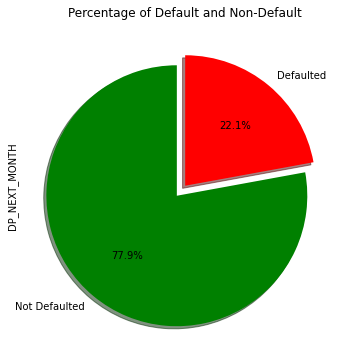

In [ ]:
# Chart - 1 visualization code
# Dependent Column Value Counts
print(df.DP_NEXT_MONTH.value_counts())
print(" ")
# Dependent Variable Column Visualization
df['DP_NEXT_MONTH'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,shadow=True,
                               labels=['Not Defaulted','Defaulted'],colors=['green','red'],explode=[0.1,0])
plt.title('Percentage of Default and Non-Default')

##### 1. Why did you pick the specific chart?

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole. 

Because DP_NEXT_MONTH is a categorical variable, a pie chart is more crucial for comprehending how the dependent variable is distributed.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that, there are 23364 customers which have not defaulted which is 77.9% of the whole clients data given in the dataset. On other hand, 6636 customers have defaulted which is 22.1% of the whold customers data given in the dataset.

22.1% customers are defaulted which might look like a small number, but from a banking institution prospective it is a huge sum of non-performing assets. So, Immediate action should be taken.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Default is when a debt, whether a loan or a security, is not paid back in full, either in terms of interest or principal. Debt can be defaulted on by individuals, businesses, and even nations. Default risk is a significant thought for lenders.

When a borrower fails to make a payment and continues to do so in the future, the financial institution's non-performing assets increase. Morever cibil score of borrower will have negative impact.

Any business can incur significant costs from an increase in NPAs. This gives the company a bad reputation in the market, which makes it harder for the company to market and an increase in NPAs can even result in the company's bankruptcy. 

#### <b> Chart 2 - DP_NEXT_MONTH Vs SEX (Univariate + Bivariate Analysis)</b>


In [ ]:
# Defining a  function for contingency table of two series
def crosstable(input_series1 = None,input_series2 = None):
  ''' This function take 2 series as input and 
  return crosstable as output with margins = True 
  '''
  output = pd.crosstab(input_series1,input_series2, margins = True)
  return output

In [ ]:
# Defining a function for contingency table of two series with percent values
def crosstable_percent(input_series1 = None,input_series2 = None):
  ''' This function take 2 series as input and 
  return crosstable with percent values
  as output with margins = True 
  '''
  table = pd.crosstab(input_series1,input_series2, margins = True)
  table_percent = (table / table.loc['All'])*100
  return table_percent

In [ ]:
# creating a dataframe for DP_NEXT_MONTH and SEX 
df_gender = crosstable(df['DP_NEXT_MONTH'],df['SEX'])

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }
# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male', 2 : 'Female'}

df_gender.rename(index = new_index, columns = new_columns, inplace = True)
df_gender

SEX,Male,Female,All
DP_NEXT_MONTH,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_gender_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['SEX'])

# default payment next month:
# 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%', }
# SEX: 
# 1 = male; 2 = female
new_columns = {1 : 'Male%', 2 : 'Female%'}

df_gender_percent.rename(index = new_index, columns = new_columns, inplace = True)
df_gender_percent

SEX,Male%,Female%,All
DP_NEXT_MONTH,,,
Non-default%,75.832773,79.223719,77.88
Default%,24.167227,20.776281,22.12
All,100.000000,100.000000,100.00


[Text(0.5, 1.0, 'Number of Male and Female in Dataset')]

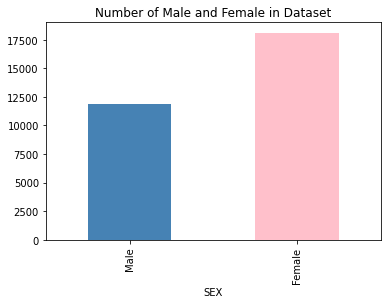

In [ ]:
# Chart - 2 visualization code
# Dependent Column Value Vs SEX
ax1 = df_gender.loc['All'][0:2].plot.bar(color = ['steelblue','pink'])
ax1.set(title ='Number of Male and Female in Dataset')

[Text(0.5, 1.0, 'Percentage of Male and Female in the dataset')]

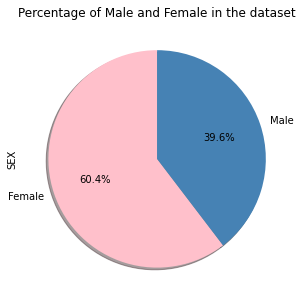

In [ ]:
# visualization code to visualize percentage of Male and Female
ax2 = df['SEX'].value_counts().plot(kind='pie',figsize=(10,5),autopct="%1.1f%%",startangle=90,shadow=True,
                      labels=['Female','Male'],colors=['pink','steelblue'])
ax2.set(title ='Percentage of Male and Female in the dataset')

[Text(0.5, 1.0, 'Number of Defaults by Gender')]

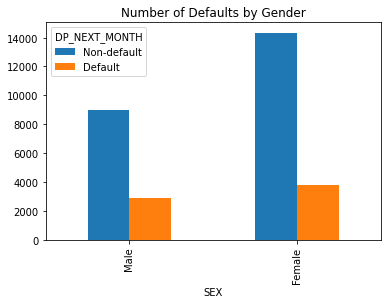

In [ ]:
# visualizing Number of defaults by Male and Female
ax3 = df_gender[0:2][['Male','Female']].T.plot.bar()
ax3.set(title = 'Number of Defaults by Gender')

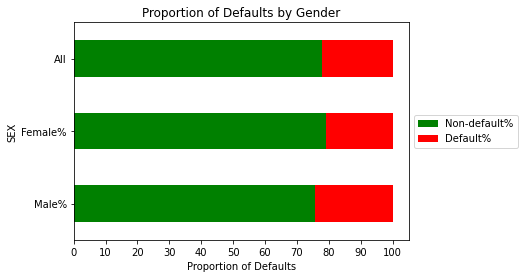

In [ ]:
# Ploting the proportion of defaults by gender
ax4 = df_gender_percent[0:2].T.plot.barh(stacked=True, xticks=list(np.linspace(0, 100, 11)),color = ['green','red'])
ax4.set(title = 'Proportion of Defaults by Gender',xlabel = 'Proportion of Defaults')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole.

Stacked charts are an extremely useful tool for comparisons. They are made to compare the total values of different categories.

I used a bar chart to show the number of DP_NEXT_MONTH by SEX.
I used pie chart to show the percentage of Male and female in the dataset.
I used a stacked bar to show proportion the data by category.


##### 2. What is/are the insight(s) found from the chart?

* The data set contains 11888 males and 18112 females.
* As number of females are higher in the data so number of defaults by females in the data is higher but if we compare the percent we will get real picture.
* For the entire data set, approximately 22.1% of the individuals defaulted.
* Approximately 24.2% of the males defaulted.
* Approximately 20.8% of the females defaulted.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The extent of defaults for male is somewhat higher than the extent of defaults for females. However, this difference appears to be insignificant and might not be statistically significant.

#### <b>Chart 3 - DP_NEXT_MONTH Vs EDUCATION (Univariate + Bivariate Analysis)
</b>

In [ ]:
# creating a dataframe for SEX and DP_NEXT_MONTH 
df_edu = crosstable(df['DP_NEXT_MONTH'],df['EDUCATION'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }
# EDUCATION :1 = graduate school; 2 = university; 3 = high school; 4 = others.
new_columns = {1 : 'Graduate school', 2 : 'University', 3 : 'High school', 4 : 'Others'}

df_edu.rename(index = new_index, columns = new_columns, inplace = True)
df_edu

EDUCATION,Graduate school,University,High school,Others,All
DP_NEXT_MONTH,,,,,
Non-default,8549,10700,3680,435,23364
Default,2036,3330,1237,33,6636
All,10585,14030,4917,468,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_edu_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['EDUCATION'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%', }
# EDUCATION :1 = graduate school; 2 = university; 3 = high school; 4 = others.
new_columns = {1 : 'Graduate school%', 2 : 'University%', 3 : 'High school%', 4 : 'Others%'}

df_edu_percent.rename(index = new_index, columns = new_columns, inplace = True)
df_edu_percent

EDUCATION,Graduate school%,University%,High school%,Others%,All
DP_NEXT_MONTH,,,,,
Non-default%,80.765234,76.265146,74.842384,92.948718,77.88
Default%,19.234766,23.734854,25.157616,7.051282,22.12
All,100.000000,100.000000,100.000000,100.000000,100.00


[Text(0.5, 1.0, 'Number of Individuals with Education Level')]

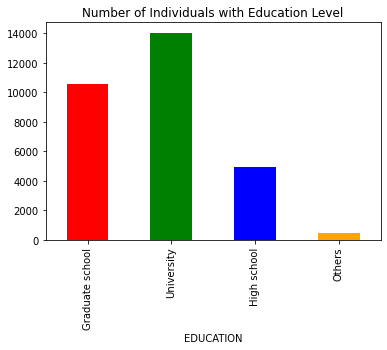

In [ ]:
# Chart - 3 visualization code
# Dependent Column Value Vs EDUCATION level
ax1 = df_edu.loc['All'][0:4].plot(kind = 'bar',color = ['red','green', 'blue','orange'])
ax1.set(title ='Number of Individuals with Education Level')

[Text(0.5, 1.0, 'Percentage of Individuals with Education Level')]

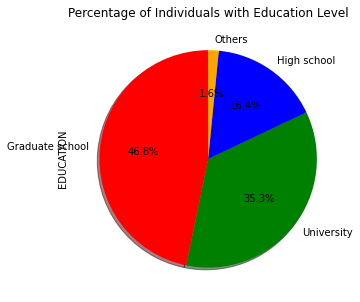

In [ ]:
# creating a pie chart to compare percentage of EDUCATION levels
ax2 = df['EDUCATION'].value_counts().plot(kind='pie',figsize=(10,5),autopct="%1.1f%%",startangle=90,shadow=True,
                      labels=['Graduate school','University','High school','Others'],colors=['red','green', 'blue','orange'])
ax2.set(title ='Percentage of Individuals with Education Level')

[Text(0.5, 1.0, 'Number of Defaults by Education level')]

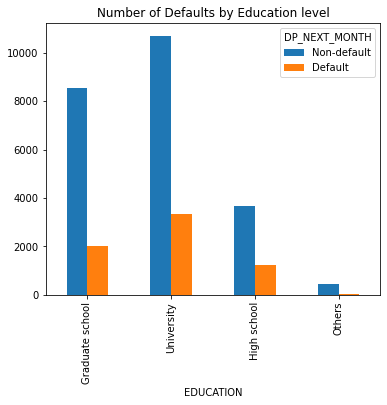

In [ ]:
# visualizing Number of defaults by EDUCATION level
ax3 = df_edu[0:2][['Graduate school','University','High school','Others']].T.plot.bar(figsize=(6, 5))
ax3.set(title = 'Number of Defaults by Education level')

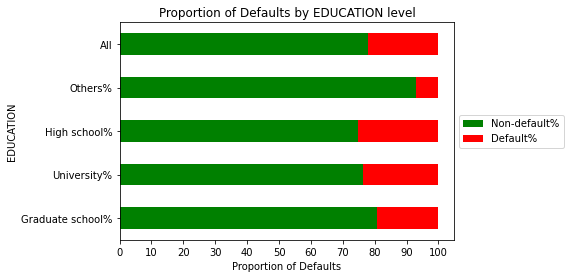

In [ ]:
# Plot the proportion of defaults by EDUCATION level
ax4 = df_edu_percent[0:2].T.plot.barh(stacked=True, xticks=list(np.linspace(0, 100, 11)),color=['green','red'])
ax4.set(title = 'Proportion of Defaults by EDUCATION level',xlabel = 'Proportion of Defaults')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
     

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole.

Stacked charts are an extremely useful tool for comparisons. They are made to compare the total values of different categories.

I used a bar chart to show the number of DP_NEXT_MONTH by EDUCATION. 
I used pie chart to show the percentage of different level of Education in the dataset. 
I used a stacked bar to show proportion the data by category.

##### 2. What is/are the insight(s) found from the chart?

The data set contains information on the level of educational attainment for each individual. There are:

* 10,585 individuals with graduate school educations;
* 14,030 individuals with university educations;
* 4,917 individuals with high school educations; and
* 468 individuals categorized as 'others'.

The proportion of defaults seems to decrease as the level of education increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

One might expect that people with higher degrees tend to earn more than people with lower degrees, all else equal. Therefore, there might be reason to think that the proportion of defaults would decrease as the level of education increases.

Credit card compannies should try to give more credit limit to more educated person which will reduce the default probalilities.

#### <b>Chart 4 - DP_NEXT_MONTH Vs MARRIAGE (Univariate + Bivariate Analysis)</b>

In [ ]:
# creating a dataframe for MARRIAGE and DP_NEXT_MONTH 
df_marriage = crosstable(df['DP_NEXT_MONTH'],df['MARRIAGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }
# MARRIAGE : 1 = married; 2 = single; 3 = divorce; 0=others
new_columns = {1 : 'married', 2 : 'single', 3 : 'divorce', 0:'others'}

df_marriage.rename(index = new_index, columns = new_columns, inplace = True)
df_marriage

MARRIAGE,others,married,single,divorce,All
DP_NEXT_MONTH,,,,,
Non-default,49,10453,12623,239,23364
Default,5,3206,3341,84,6636
All,54,13659,15964,323,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_marriage_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['MARRIAGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%', }
# MARRIAGE : 1 = married; 2 = single; 3 = divorce; 0=others
new_columns = {1 : 'married%', 2 : 'single%', 3 : 'divorce%', 0:'others%'}

df_marriage_percent.rename(index = new_index, columns = new_columns, inplace = True)
df_marriage_percent

MARRIAGE,others%,married%,single%,divorce%,All
DP_NEXT_MONTH,,,,,
Non-default%,90.740741,76.528296,79.071661,73.993808,77.88
Default%,9.259259,23.471704,20.928339,26.006192,22.12
All,100.000000,100.000000,100.000000,100.000000,100.00


[Text(0.5, 1.0, 'Number of Individuals with Marital Status')]

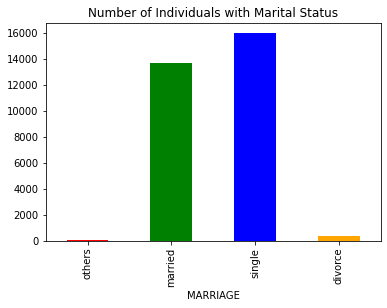

In [ ]:
# Chart - 4 visualization code
# Dependent Column Value Vs MARRIAGE
ax1 = df_marriage.loc['All'][0:4].plot(kind = 'bar',color = ['red','green', 'blue','orange'])
ax1.set(title ='Number of Individuals with Marital Status')

[Text(0.5, 1.0, 'Percentage of Individuals with Marital Status')]

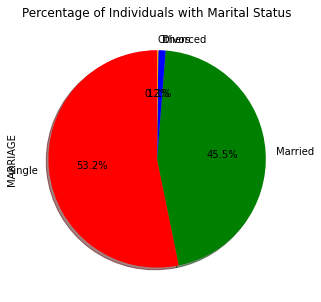

In [ ]:
# creating a pie chart to compare percentage of Marital Status
ax2 = df['MARRIAGE'].value_counts().plot(kind='pie',figsize=(10,5),autopct="%1.1f%%",startangle=90,shadow=True,
                      labels=['Single','Married','Divorced','Others'],colors=['red','green', 'blue','orange'])
ax2.set(title ='Percentage of Individuals with Marital Status')

[Text(0.5, 1.0, 'Number of Defaults by Marital Status')]

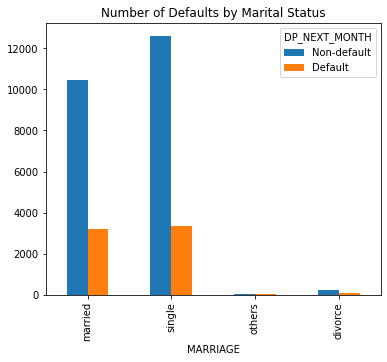

In [ ]:
# visualizing Number of defaults by MARRIAGE
ax3 = df_marriage[0:2][['married','single','others','divorce']].T.plot.bar(figsize=(6, 5))
ax3.set(title = 'Number of Defaults by Marital Status')

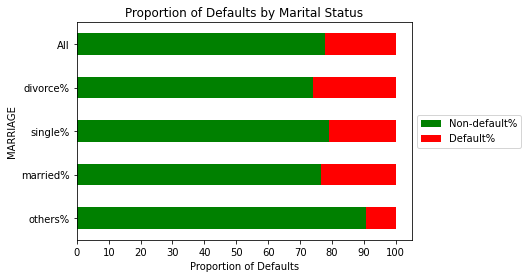

In [ ]:
# Plot the proportion of defaults by MARRIAGE
ax4 = df_marriage_percent[0:2].T.plot.barh(stacked=True, xticks=list(np.linspace(0, 100, 11)),color=['green','red'])
ax4.set(title = 'Proportion of Defaults by Marital Status',xlabel = 'Proportion of Defaults')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))     

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Data can be organized and displayed as a percentage of the total using a pie chart. This kind of visualization, true to its name, uses a circle to represent the whole and slices of that circle, or "pies," to represent the particular categories that make up the whole.

Stacked charts are an extremely useful tool for comparisons. They are made to compare the total values of different categories.

I used a bar chart to show the number of DP_NEXT_MONTH by MARRIAGE. 
I used pie chart to show the percentage of different marital status in the dataset. 
I used a stacked bar to show proportion the data by category.

##### 2. What is/are the insight(s) found from the chart?

The data set contains information on the marital status of each individual. There are:

* 13,659 married individuals;
* 15,964 single individuals;
* 323 divorced individuals;
* 54 individuals categorized as 'others'.

The proportion of defaults seems to be highest for divorced individuals and lowest for single individuals (ignoring "Others" due to very low count).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The divorce process can inflict enormous legal expense;
Divorced individuals may have larger housing costs than married couples, since divorced individuals can no longer save on housing expenses.

So there is high risk of default in case of divorced marital status.

#### <b>Chart 5 - DP_NEXT_MONTH Vs AGE (Univariate + Bivariate Analysis)</b>

In [ ]:
# creating a dataframe for AGE and DP_NEXT_MONTH 
df_age = crosstable(df['DP_NEXT_MONTH'],df['AGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default', }

df_age.rename(index = new_index, inplace = True)
df_age

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,53,391,684,827,884,1003,1164,1123,1292,1121,988,933,931,931,887,854,812,750,755,683,639,609,520,538,501,413,381,362,333,310,252,226,251,191,152,129,95,91,62,44,35,37,23,22,19,18,11,4,12,8,3,2,1,1,2,1,23364
Default,14,169,247,300,302,253,313,286,313,274,229,225,215,231,226,254,229,194,199,187,185,185,150,162,116,157,120,104,119,101,88,78,74,56,57,49,27,31,21,23,21,7,8,9,5,7,5,1,3,2,0,1,3,0,1,0,6636
All,67,560,931,1127,1186,1256,1477,1409,1605,1395,1217,1158,1146,1162,1113,1108,1041,944,954,870,824,794,670,700,617,570,501,466,452,411,340,304,325,247,209,178,122,122,83,67,56,44,31,31,24,25,16,5,15,10,3,3,4,1,3,1,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_age_percent =  crosstable_percent(df['DP_NEXT_MONTH'],df['AGE'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%'}

df_age_percent.rename(index = new_index, inplace = True)
df_age_percent

AGE,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,79,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default%,79.104478,69.821429,73.469388,73.380657,74.536256,79.856688,78.808395,79.701916,80.498442,80.358423,81.183237,80.569948,81.239092,80.120482,79.694519,77.075812,78.001921,79.449153,79.140461,78.505747,77.548544,76.700252,77.61194,76.857143,81.199352,72.45614,76.047904,77.682403,73.672566,75.425791,74.117647,74.342105,77.230769,77.327935,72.727273,72.47191,77.868852,74.590164,74.698795,65.671642,62.5,84.090909,74.193548,70.967742,79.166667,72.0,68.75,80.0,80.0,80.0,100.0,66.666667,25.0,100.0,66.666667,100.0,77.88
Default%,20.895522,30.178571,26.530612,26.619343,25.463744,20.143312,21.191605,20.298084,19.501558,19.641577,18.816763,19.430052,18.760908,19.879518,20.305481,22.924188,21.998079,20.550847,20.859539,21.494253,22.451456,23.299748,22.38806,23.142857,18.800648,27.54386,23.952096,22.317597,26.327434,24.574209,25.882353,25.657895,22.769231,22.672065,27.272727,27.52809,22.131148,25.409836,25.301205,34.328358,37.5,15.909091,25.806452,29.032258,20.833333,28.0,31.25,20.0,20.0,20.0,0.0,33.333333,75.0,0.0,33.333333,0.0,22.12
All,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.0,100.00,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.000000,100.0,100.00


[Text(0.5, 1.0, 'Number of Individuals by AGE')]

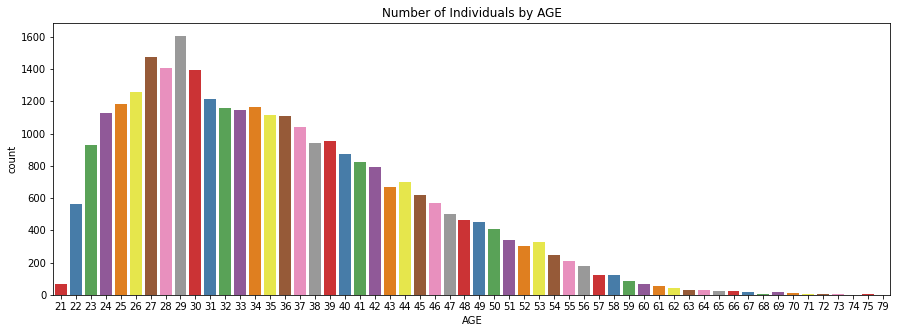

In [ ]:
# Chart - 5 visualization code
# Dependent Column Value Vs AGE
plt.figure(figsize=(15,5))
ax1 = sns.countplot(x = df['AGE'], data = df, palette= 'Set1' )
ax1.set(title = 'Number of Individuals by AGE')

[Text(0.5, 1.0, 'Number of Defaults by Age')]

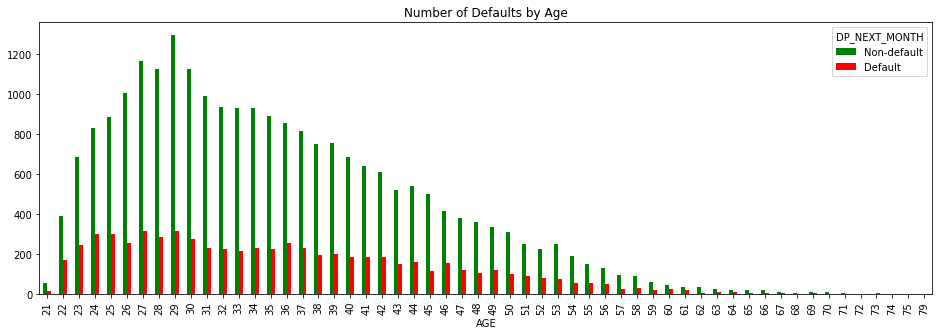

In [ ]:
# visualizing Number of defaults by AGE
ax2 = df_age.iloc[0:2,0:-1].T.plot.bar(figsize=(16, 5), color = ['g','r'])
ax2.set(title = 'Number of Defaults by Age')

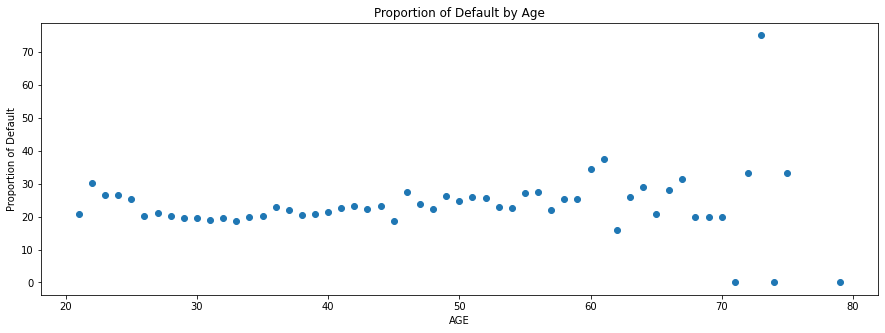

In [ ]:
# Plot the proportion of defaults by AGE
fig = plt.figure(figsize=(15, 5))

# assigning x and y value for scatter plot
y = df_age_percent.iloc[1:2,0:-1]
x = df_age_percent.T.index[0:-1]

plt.scatter(x,y)
plt.title('Proportion of Default by Age')
plt.xlabel('AGE')
plt.ylabel('Proportion of Default')
plt.show()

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

##### 2. What is/are the insight(s) found from the chart?

* The proportion of defaults seems to be non-linearly related with age.
* The proportion of defaults seems to decrease or constant from the early 20s to the early 60s.
* The proportion of defaults seems to increase from the early 60s onward.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For the age of 20s to 60s there is almost constant proportion of age default for credit card payment yet one insightful information is that there is higher risk for people of age group more than 60s.

#### <b>Chart 6 - DP_NEXT_MONTH Vs LIMIT_BAL (Univariate + Bivariate Analysis)</b>

In [ ]:
# creating a dataframe for LIMIT_BAL and DP_NEXT_MONTH 
df_limit_bal = crosstable(df['DP_NEXT_MONTH'],df['LIMIT_BAL'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default', 1: 'Default'}

df_limit_bal.rename(index = new_index, inplace = True)
df_limit_bal

LIMIT_BAL,10000,16000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000,230000,240000,250000,260000,270000,280000,290000,300000,310000,320000,327680,330000,340000,350000,360000,370000,380000,390000,400000,410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,710000,720000,730000,740000,750000,760000,780000,800000,1000000,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default,296,2,1278,1042,138,2480,592,521,1204,485,776,456,547,572,579,923,557,454,819,180,1258,613,380,624,509,299,434,210,424,295,459,245,268,0,152,185,199,727,63,136,156,240,66,150,73,71,135,70,69,73,56,641,17,18,9,6,15,9,8,10,5,13,11,8,6,7,3,3,3,3,1,8,5,2,2,1,4,1,2,2,1,23364
Default,197,0,698,568,92,885,233,210,363,166,272,132,179,157,170,187,137,78,176,49,270,117,89,113,110,51,87,28,69,53,95,27,44,1,21,32,32,154,8,20,18,31,12,18,10,12,26,10,11,6,8,81,2,2,1,0,6,1,0,1,1,3,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,6636
All,493,2,1976,1610,230,3365,825,731,1567,651,1048,588,726,729,749,1110,694,532,995,229,1528,730,469,737,619,350,521,238,493,348,554,272,312,1,173,217,231,881,71,156,174,271,78,168,83,83,161,80,80,79,64,722,19,20,10,6,21,10,8,11,6,16,11,9,7,7,3,3,3,4,1,8,6,3,2,2,4,1,2,2,1,30000


In [ ]:
# creating a percentage table by dividing each column by the column's total.
df_limit_bal_percent = crosstable_percent(df['DP_NEXT_MONTH'],df['LIMIT_BAL'])

# DP_NEXT_MONTH: 0 = non-default; 1 = default
new_index = {0: 'Non-default%', 1: 'Default%'}

df_limit_bal_percent.rename(index = new_index, inplace = True)
df_limit_bal_percent

LIMIT_BAL,10000,16000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000,210000,220000,230000,240000,250000,260000,270000,280000,290000,300000,310000,320000,327680,330000,340000,350000,360000,370000,380000,390000,400000,410000,420000,430000,440000,450000,460000,470000,480000,490000,500000,510000,520000,530000,540000,550000,560000,570000,580000,590000,600000,610000,620000,630000,640000,650000,660000,670000,680000,690000,700000,710000,720000,730000,740000,750000,760000,780000,800000,1000000,All
DP_NEXT_MONTH,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Non-default%,60.040568,100.0,64.676113,64.720497,60.0,73.699851,71.757576,71.27223,76.834716,74.500768,74.045802,77.55102,75.344353,78.463649,77.303071,83.153153,80.259366,85.338346,82.311558,78.60262,82.329843,83.972603,81.023454,84.667571,82.229402,85.428571,83.301344,88.235294,86.004057,84.770115,82.851986,90.073529,85.897436,0.0,87.861272,85.253456,86.147186,82.519864,88.732394,87.179487,89.655172,88.560886,84.615385,89.285714,87.951807,85.542169,83.850932,87.5,86.25,92.405063,87.5,88.781163,89.473684,90.0,90.0,100.0,71.428571,90.0,100.0,90.909091,83.333333,81.25,100.0,88.888889,85.714286,100.0,100.0,100.0,100.0,75.0,100.0,100.0,83.333333,66.666667,100.0,50.0,100.0,100.0,100.0,100.0,100.0,77.88
Default%,39.959432,0.0,35.323887,35.279503,40.0,26.300149,28.242424,28.72777,23.165284,25.499232,25.954198,22.44898,24.655647,21.536351,22.696929,16.846847,19.740634,14.661654,17.688442,21.39738,17.670157,16.027397,18.976546,15.332429,17.770598,14.571429,16.698656,11.764706,13.995943,15.229885,17.148014,9.926471,14.102564,100.0,12.138728,14.746544,13.852814,17.480136,11.267606,12.820513,10.344828,11.439114,15.384615,10.714286,12.048193,14.457831,16.149068,12.5,13.75,7.594937,12.5,11.218837,10.526316,10.0,10.0,0.0,28.571429,10.0,0.0,9.090909,16.666667,18.75,0.0,11.111111,14.285714,0.0,0.0,0.0,0.0,25.0,0.0,0.0,16.666667,33.333333,0.0,50.0,0.0,0.0,0.0,0.0,0.0,22.12
All,100.000000,100.0,100.000000,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.00,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.0,100.000000,100.0,100.0,100.000000,100.000000,100.00,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.00


[Text(0, 0, '10000'),
 Text(0, 0, '200000'),
 Text(0, 0, '400000'),
 Text(0, 0, '600000'),
 Text(0, 0, '1000000')]

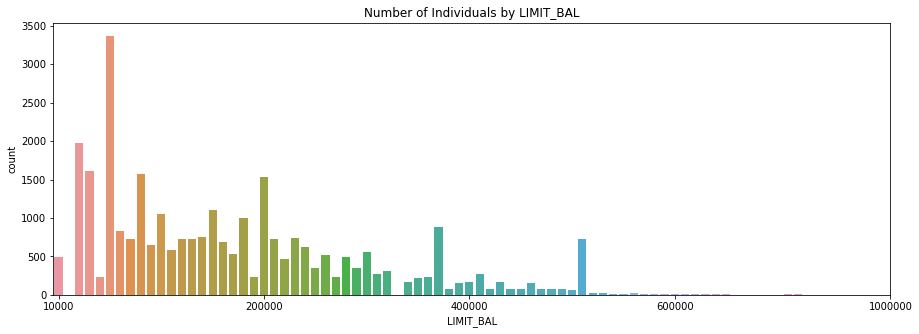

In [ ]:
# Chart - 6 visualization code
# Dependent Column Value Vs LIMIT_BAL
fig = plt.figure(figsize=(15, 5))
ax1 = sns.countplot(x = df['LIMIT_BAL'])
ax1.set(title = 'Number of Individuals by LIMIT_BAL')
ax1.set(xticks=([0,20,40,60,81]))
ax1.set_xticklabels(labels = [10000, 200000, 400000,600000,1000000])

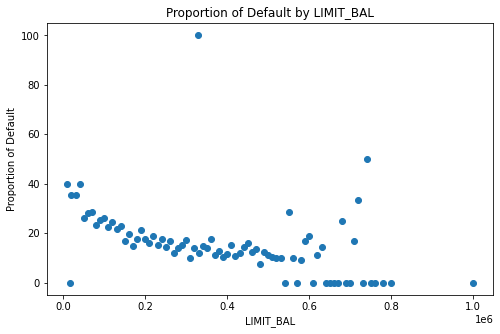

In [ ]:
# Plot the proportion of defaults by LIMIT_BAL
fig = plt.figure(figsize=(8, 5))

# assigning x and y values for scatter plot
y = df_limit_bal_percent.iloc[1:2,0:-1]
x = df_limit_bal_percent.T.index[0:-1]

plt.scatter(x,y)
plt.title('Proportion of Default by LIMIT_BAL')
plt.xlabel('LIMIT_BAL')
plt.ylabel('Proportion of Default')
plt.show()

##### 1. Why did you pick the specific chart?

The frequency counts of values at various levels of a categorical or nominal variable are depicted in bar charts. Other statistics, such as percentages, are sometimes displayed in bar charts.

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

##### 2. What is/are the insight(s) found from the chart?

* The proportion of defaults seems to be negatively correlated with credit limit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Granting the higher credit limit reduces the risk of credit card payment default

#### <b>Chart 7 - DP_NEXT_MONTH Vs Past Payment History (Multivariate Analysis)</b>

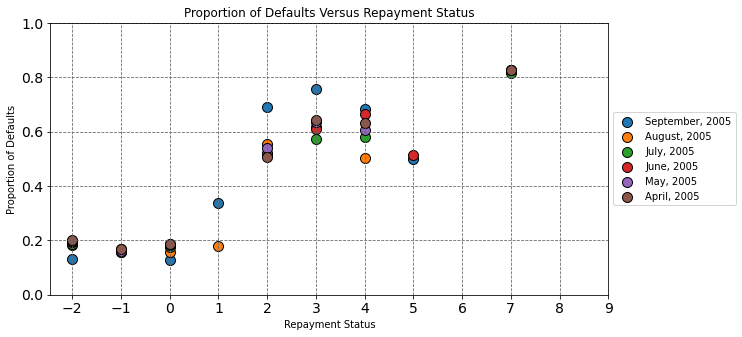

In [ ]:
# list of all past payments
pay_list =['PAY_1',  'PAY_2',  'PAY_3',  'PAY_4',  'PAY_5',  'PAY_6']

# dictionary mapping
label_dict ={'PAY_1': 'September, 2005', 
             'PAY_2': 'August, 2005', 
             'PAY_3': 'July, 2005', 
             'PAY_4': 'June, 2005',  
             'PAY_5': 'May, 2005',  
             'PAY_6': 'April, 2005'}

# creating a dataframe for pay
pay_dfs = {}
for item in pay_list:
    pay_dfs[item] = df.groupby([item, 'DP_NEXT_MONTH']).size().unstack()
    pay_dfs[item] = pay_dfs[item][pay_dfs[item].sum(axis=1)>25]
    # Calculate proportions
    pay_dfs[item] = pay_dfs[item].div(pay_dfs[item].sum(axis=1), axis='index')
    pay_dfs[item].sort_index(ascending=False, inplace=True)


# plot the scatter chart
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for item in pay_list:
    ax.scatter(x=pay_dfs[item].index, 
               y=pay_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)    
    
ax.set_ylim([0, 1])
ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(ticks)

ax.xaxis.set_ticks(ticks=ticks, minor=False)
ax.grid(b=True, which='major', color='0.4', linestyle='--')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Proportion of Defaults Versus Repayment Status')  
plt.ylabel('Proportion of Defaults')
plt.xlabel('Repayment Status')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are used to plot data points on a horizontal and a vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker whose position depends on its values in the columns set on the X and Y axes.

##### 2. What is/are the insight(s) found from the chart?

The proportion of defaults for observations with payment delay for 2 or more months are much higher than the other observations.

#### <b>Chart 8 - DP_NEXT_MONTH Vs Past Bill Amounts (Multivariate Analysis)</b>

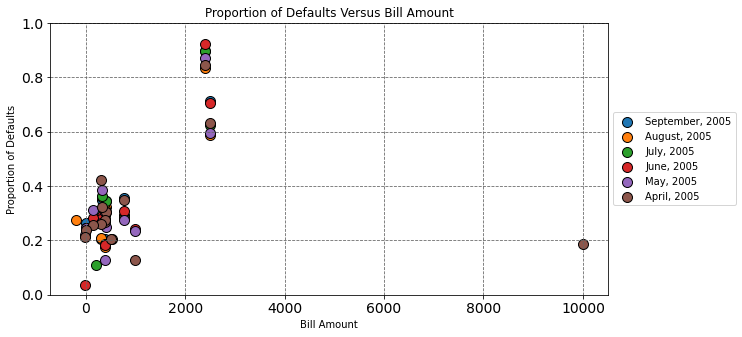

In [ ]:
# list of all past bill amounts
bill_amount_list =['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# dictionary mapping
label_dict ={'BILL_AMT1': 'September, 2005',  
             'BILL_AMT2': 'August, 2005',
             'BILL_AMT3': 'July, 2005', 
             'BILL_AMT4': 'June, 2005',  
             'BILL_AMT5': 'May, 2005', 
             'BILL_AMT6': 'April, 2005'}

# creating a dataframe for pay
bill_amount_dfs = {}
for item in bill_amount_list:
    bill_amount_dfs[item] = df.groupby([item, 'DP_NEXT_MONTH']).size().unstack()
    bill_amount_dfs[item] = bill_amount_dfs[item][bill_amount_dfs[item].sum(axis=1)>25]
    # Calculate proportions
    bill_amount_dfs[item] = bill_amount_dfs[item].div(bill_amount_dfs[item].sum(axis=1), axis='index')
    bill_amount_dfs[item].sort_index(ascending=False, inplace=True)


# plot the scatter chart
fig, ax = plt.subplots(1, 1, figsize=(10,5))
for item in bill_amount_list:
    ax.scatter(x=bill_amount_dfs[item].index, 
               y=bill_amount_dfs[item][1],
               label=label_dict.get(item),
               s=100, 
               edgecolor='k', 
               lw=1)    
    
ax.set_ylim([0, 1])
ax.grid(b=True, which='major', color='0.4', linestyle='--')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for spine in ax.spines.values():
    spine.set_edgecolor('k')

plt.title('Proportion of Defaults Versus Bill Amount')  
plt.ylabel('Proportion of Defaults')
plt.xlabel('Bill Amount')
plt.show()

##### 1. Why did you pick the specific chart?

The scatter plot is most frequently used to illustrate the nature of the relationship between two variables. Positive or negative, non-direct or straight, as well as significant areas of strength for the powerless, the observed connections can be found.

We use a scatter plot to comprehend the relationship between various variables for a multivariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From above graph we can say that if the bill amount is higher than 2000 NT Dollars, customers have higher chance of default payments.

## **5. Hypothesis Testing**

#### Based on chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through codes and statistical testings.

Creating a class to calculate mean, median, variance, P value and all other metrics required for the calculation of hypothesis testing.

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  
# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

1. Men not defaulting are more than or equal to 40 years of AGE.
2. Customers defaulting have limit balance less than 100000.
3. Customers defaulting have total last bill amount of 50000.

In all of the hypothesis tests in this notebook, we will use a significance level of α = 0.05

#### Hypothetical Statement - 1
Men not defaulting are more than or equal to 40 years of AGE.

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 40

Alternate Hypothesis : N < 40

Test Type: Left Tailed Test


#####  Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# SEX: 
# 1 = male; 2 = female

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default

hypo_1 = df[(df['SEX']==1) & (df["DP_NEXT_MONTH"]==0)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 40
sample_mean = hypo_1["AGE"].mean()
size = len(hypo_1)
std=(variance(hypo_1["AGE"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='l',t="false",hypothesis_number=hypothesis_number,df=hypo_1,col="AGE")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 1.2867824212425077e-290


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been failed to reject and Male customers not defaulting are more than 40 years of Age.

##### Why did you choose the specific statistical test?

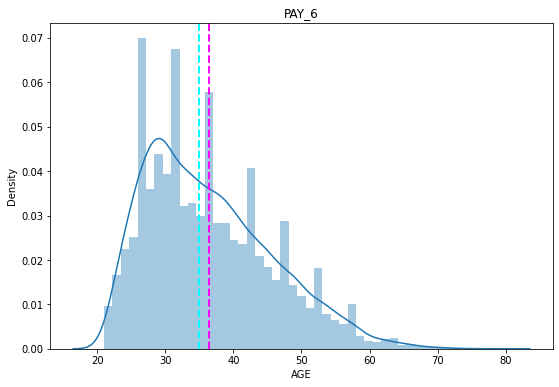

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_1["AGE"])
sns.distplot(hypo_1["AGE"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_1["AGE"].mean()- hypo_1["AGE"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 1.4286189683860258


As shown in the figure the mean is approximately same as the median, difference of mean and median is 1.42 (less than 10). Thus, it is a Normal Distribution. That's why I have used Z-Test directly.

We have to failed to reject the null hypothesis that N < 40

#### Hypothetical Statement - 2
Customers defaulting have limit balance less than 100000

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 100000

Alternate Hypothesis : N > 100000

Test Type: Right Tailed Test


##### Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_2=df[(df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 100000
sample_mean = hypo_2["LIMIT_BAL"].mean()
size = len(hypo_2)
std=(variance(hypo_2["LIMIT_BAL"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='r',t="true",hypothesis_number=hypothesis_number,df=hypo_2,col="LIMIT_BAL")

# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 4.4753017364632867e-97


##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected and Customers defaulting have limit balance less than 100000 is a wrong statement.

##### Why did you choose the specific statistical test?

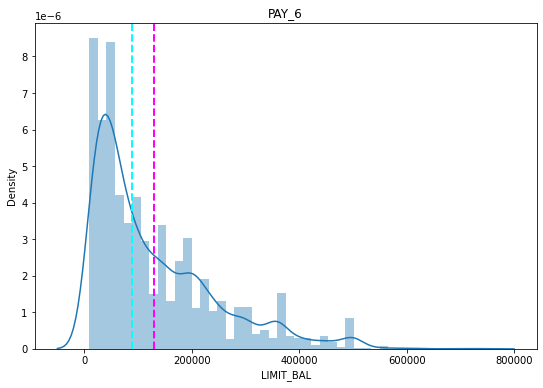

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_2["LIMIT_BAL"])
sns.distplot(hypo_2["LIMIT_BAL"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_2["LIMIT_BAL"].mean()- hypo_2["LIMIT_BAL"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 40109.65641952984


From the above chart we can see median is greater than mean over 10000. So, the distribution is postively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

#### Hypothetical Statement - 3
Customers defaulting have total last bill amount of 50000.

##### State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: N = 50000

Alternate Hypothesis : N != 50000

Test Type: Two Tailed test


##### Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# DP_NEXT_MONTH:
# 0 = non-default; 1 = default
hypo_3=df[(df["DP_NEXT_MONTH"]==1)]

# Getting the required parameter values for hypothesis testing
hypothesis_number = 50000
sample_mean = hypo_3["BILL_AMT1"].mean()
size = len(hypo_3)
std=(variance(hypo_3["BILL_AMT1"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)

# Getting P - Value
p = p_value(z=z,tailed='d',t="true",hypothesis_number=hypothesis_number,df=hypo_3,col="BILL_AMT1")

# Getting Conclusion
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.09980885383426225.


##### Which statistical test have you done to obtain P-Value?

I have used T-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been failed to reject and Customers defaulting have total last bill amount of 50000 is a correct statement.

##### Why did you choose the specific statistical test?

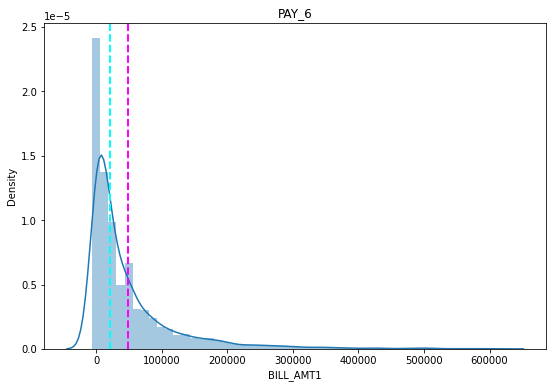

In [ ]:
# Visualizing code of hist plot for required columns to know the data distibution

fig=plt.figure(figsize=(9,6))
ax=fig.gca()
feature= (hypo_3["BILL_AMT1"])
sns.distplot(hypo_3["BILL_AMT1"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title(col)
plt.show()

In [ ]:
mean_median_difference=hypo_3["BILL_AMT1"].median()- hypo_3["BILL_AMT1"].mean()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- -28324.162296564195


From the above chart we can see median is greater than mean over 10000. So, the distribution is postively skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

## **6. Feature Engineering & Data Pre-processing**

#### <b>Copying the data and Dropping unnecessary columns

In [ ]:
# copying this data to protect the work done till now 
df_feature = df.copy()

In [ ]:
# checking the columns to drop
df_feature.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DP_NEXT_MONTH
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# dropping the ID column
df_feature.drop('ID',axis = 1, inplace = True)

In [ ]:
# checking the columns again
df_feature.columns                # good to go for next pre_processing

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DP_NEXT_MONTH'],
      dtype='object')

#### <b> Move the target variable to leftmost column</b>


In [ ]:
# Get the current list of columns names
col_names = list(df_feature.columns)
col_names

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'DP_NEXT_MONTH']

In [ ]:
# Identify the target variable column name
target = 'DP_NEXT_MONTH'

In [ ]:
# Move the target column name to the beginning of the list using index, pop, and insert
col_names.insert(0, col_names.pop(col_names.index(target)))
col_names

['DP_NEXT_MONTH',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
# Use the reordered list of columns names 
# and .loc to reorder the columns in df_interim
df_feature = df_feature.loc[:, col_names]
df_feature.head()

,DP_NEXT_MONTH,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,0,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
# checking the shape 
df_feature.shape

(30000, 24)

In [ ]:
# columns in the dataset
df_feature.columns

Index(['DP_NEXT_MONTH', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

#### <b> Replace capital letters with lower-case letters and replace spaces with underscores

In [ ]:
# Get the current list of columns names
col_names_current = list(df_feature.columns)
col_names_current

['DP_NEXT_MONTH',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
# lower the column names usinf nested loop
col_names_new = [s.lower().replace(" ", "_") for s in col_names_current]
col_names_new

['dp_next_month',
 'limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6']

In [ ]:
# mapping it with dictionary
cols_dict = {old:new for (old, new) in zip(col_names_current, col_names_new)}
cols_dict

{'DP_NEXT_MONTH': 'dp_next_month',
 'LIMIT_BAL': 'limit_bal',
 'SEX': 'sex',
 'EDUCATION': 'education',
 'MARRIAGE': 'marriage',
 'AGE': 'age',
 'PAY_1': 'pay_1',
 'PAY_2': 'pay_2',
 'PAY_3': 'pay_3',
 'PAY_4': 'pay_4',
 'PAY_5': 'pay_5',
 'PAY_6': 'pay_6',
 'BILL_AMT1': 'bill_amt1',
 'BILL_AMT2': 'bill_amt2',
 'BILL_AMT3': 'bill_amt3',
 'BILL_AMT4': 'bill_amt4',
 'BILL_AMT5': 'bill_amt5',
 'BILL_AMT6': 'bill_amt6',
 'PAY_AMT1': 'pay_amt1',
 'PAY_AMT2': 'pay_amt2',
 'PAY_AMT3': 'pay_amt3',
 'PAY_AMT4': 'pay_amt4',
 'PAY_AMT5': 'pay_amt5',
 'PAY_AMT6': 'pay_amt6'}

In [ ]:
# changing the column names
df_feature.rename(columns=cols_dict, inplace=True)
df_feature.columns

Index(['dp_next_month', 'limit_bal', 'sex', 'education', 'marriage', 'age',
       'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1',
       'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
       'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6'],
      dtype='object')

In [ ]:
# Get the current list of columns names
col_names_current = list(df_feature.columns)
col_names_current

['dp_next_month',
 'limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6']

#### <b>Changing the category column as dtype category</b>

In [ ]:
# Checking the column names to be changed into category column
# Doing this operation again as we wanted to make sure of dtype before outlier treatment.

df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   dp_next_month  30000 non-null  int64   
 1   limit_bal      30000 non-null  int64   
 2   sex            30000 non-null  category
 3   education      30000 non-null  int64   
 4   marriage       30000 non-null  category
 5   age            30000 non-null  int64   
 6   pay_1          30000 non-null  category
 7   pay_2          30000 non-null  category
 8   pay_3          30000 non-null  category
 9   pay_4          30000 non-null  category
 10  pay_5          30000 non-null  category
 11  pay_6          30000 non-null  category
 12  bill_amt1      30000 non-null  int64   
 13  bill_amt2      30000 non-null  int64   
 14  bill_amt3      30000 non-null  int64   
 15  bill_amt4      30000 non-null  int64   
 16  bill_amt5      30000 non-null  int64   
 17  bill_amt6      30000 non-null  

In [ ]:
# Make a list of categorical columns
cols=['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Cast values in the categorical columns as type str.
df_feature[cols] = df_feature[cols].astype('category')

In [ ]:
# chacking the result
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   dp_next_month  30000 non-null  int64   
 1   limit_bal      30000 non-null  int64   
 2   sex            30000 non-null  category
 3   education      30000 non-null  category
 4   marriage       30000 non-null  category
 5   age            30000 non-null  int64   
 6   pay_1          30000 non-null  category
 7   pay_2          30000 non-null  category
 8   pay_3          30000 non-null  category
 9   pay_4          30000 non-null  category
 10  pay_5          30000 non-null  category
 11  pay_6          30000 non-null  category
 12  bill_amt1      30000 non-null  int64   
 13  bill_amt2      30000 non-null  int64   
 14  bill_amt3      30000 non-null  int64   
 15  bill_amt4      30000 non-null  int64   
 16  bill_amt5      30000 non-null  int64   
 17  bill_amt6      30000 non-null  

#### <b> Handling Outliers </b>

In [ ]:
# Handling Outliers & Outlier treatments
# Using for loop to create 2 lists of columns for symmetric and non_symmetric columns

symmetric_feature=[]
non_symmetric_feature=[]
for i in df_feature.describe().columns:
  if abs(df_feature[i].mean() - df_feature[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['dp_next_month', 'limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


* Most of the columns have skew symmetric distribution.
* For symmetric columns we would use Z Score > 3 pruning.(in our case there are no columns in our symmetric_feature)
* For non-symmetric columns we are using Inter Quartile Range.
* We will also drop our dependent variable 'dp_next_month' from non_symmetric_feature as it is binary feature.

##### Handling outliers in symmetric features
(Not needed in our case)

In [ ]:
# For Symmetric features defining upper and lower boundry
# def outlier_treatment(df_feature,i):
#   upper_boundary= df_feature[i].mean() + 3*df_feature[i].std()
#   lower_boundary= df_feature[i].mean() - 3*df_feature[i].std()
#   return upper_boundary,lower_boundary

In [ ]:
# Restricting the data to lower and upper boundry
# for i in symmetric_feature:
#  df_feature.loc[df_feature[i]<=outlier_treatment(df_feature=df_feature,i=i)[1], i]=outlier_treatment(df_feature=df_feature,i=i)[1]
#  df_feature.loc[df_feature[i]>=outlier_treatment(df_feature=df_feature,i=i)[0], i]=outlier_treatment(df_feature=df_feature,i=i)[0]

##### Handling outliers in non_symmetric_features

In [ ]:
# dropping 'dp_next_month' from non_symmetric_feature
non_symmetric_feature.pop(0)

'dp_next_month'

In [ ]:
non_symmetric_feature

['limit_bal',
 'age',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6']

In [ ]:
def plotting(input_series=None):
  ''' Takes pandas series as input to inspect and give summary plot'''

  # Display boxplot and dist plot.
  f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 5) )
  sns.boxplot(x=input_series, ax=ax1)
  sns.distplot(input_series, ax=ax2)

  ax1.set_title(input_series.name)
  plt.show()
  return None

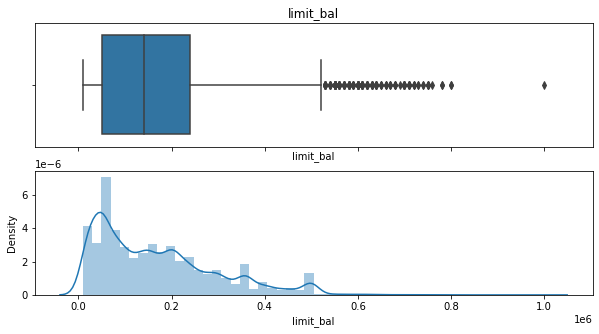

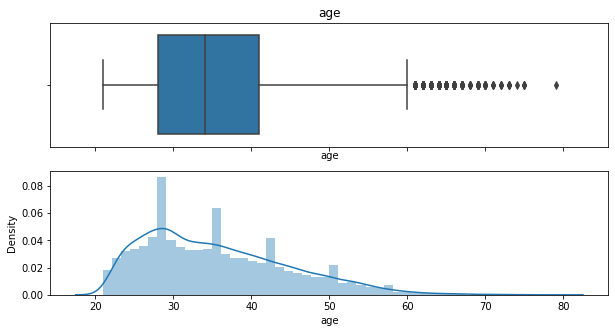

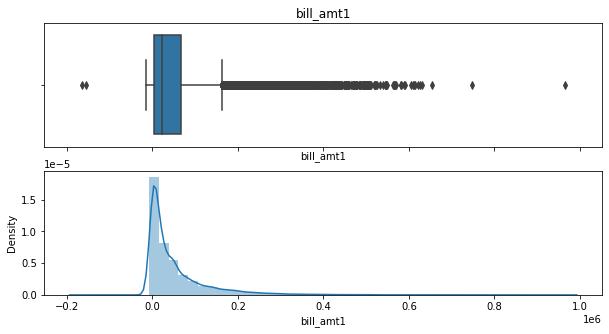

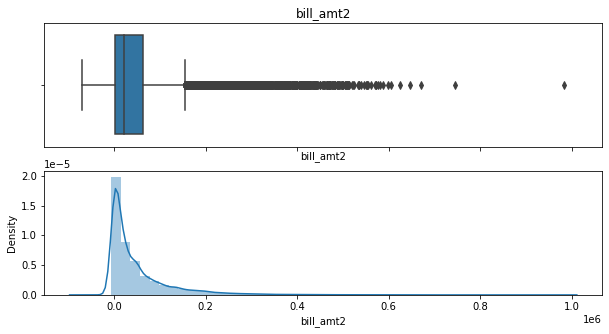

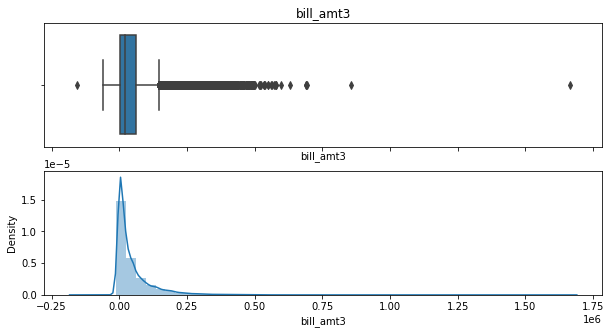

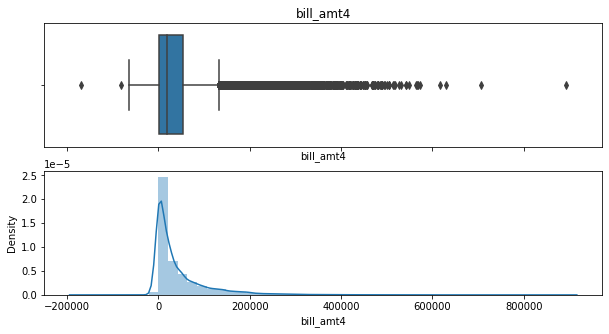

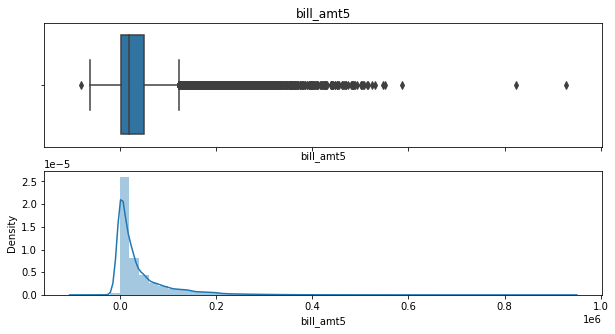

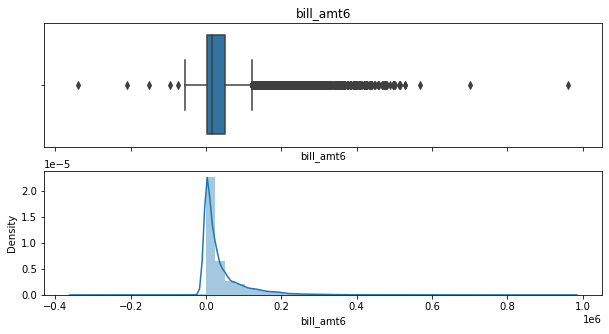

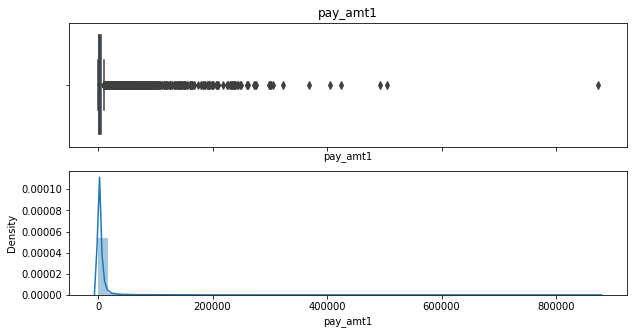

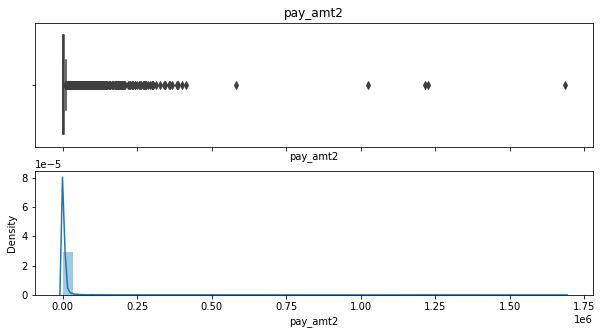

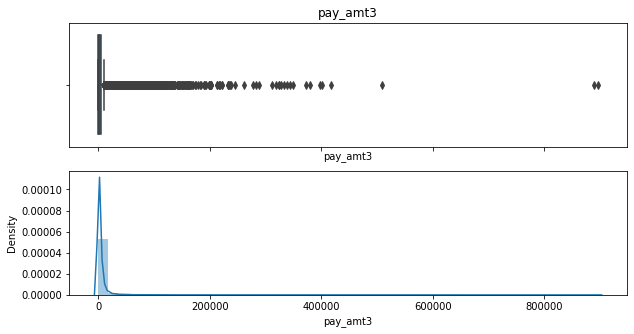

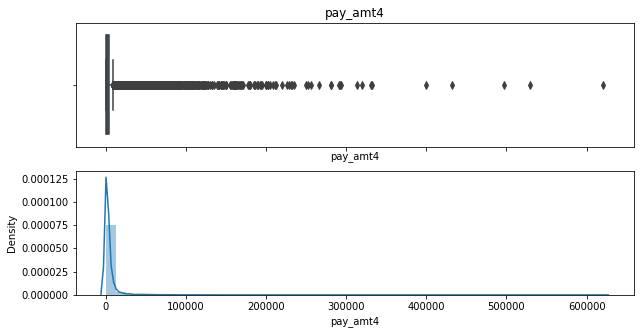

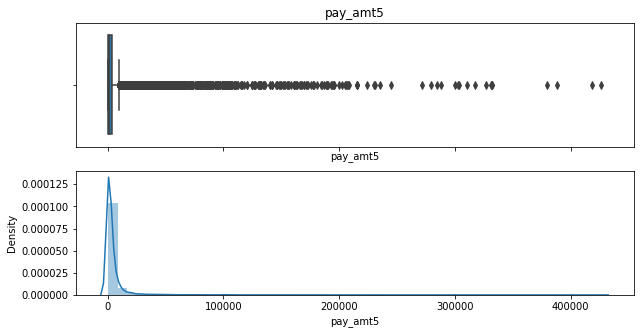

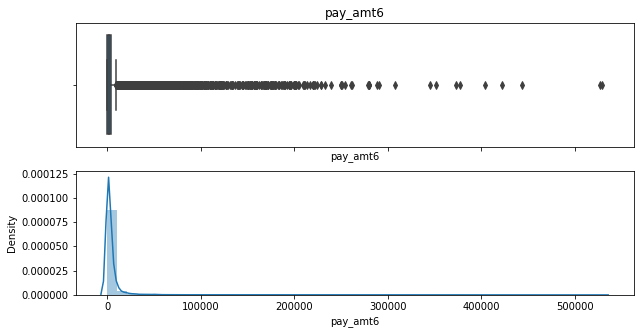

In [ ]:
# checking the plot of non_symmetric columns
for i in non_symmetric_feature:
  plotting(df_feature[i])

All of the columns in non_symmetric_features have skew symmetric distribution which we can be see from the plots.

we are going to prune the data having Z score > 3

In [ ]:
# For Skew Symmetric features defining upper and lower boundry
# we are going to prune the data having Z score > 3

def outlier_treatment_skew(df_feature,i):
  IQR= df_feature[i].quantile(0.75)- df_feature[i].quantile(0.25)
  lower_bridge =df_feature[i].quantile(0.25)-3*IQR
  upper_bridge =df_feature[i].quantile(0.25)+3*IQR
  return upper_bridge,lower_bridge

In [ ]:
# Restricting the data to lower and upper boundary
for i in non_symmetric_feature:
  df_feature.loc[df_feature[i]<= outlier_treatment_skew(df_feature=df_feature,i=i)[1], i]=outlier_treatment_skew(df_feature=df_feature,i=i)[1]
  df_feature.loc[df_feature[i]>= outlier_treatment_skew(df_feature=df_feature,i=i)[0], i]=outlier_treatment_skew(df_feature=df_feature,i=i)[0]

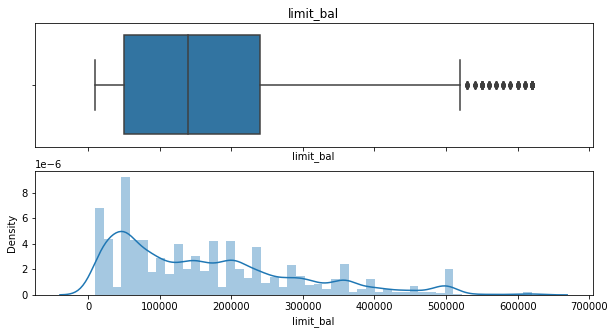

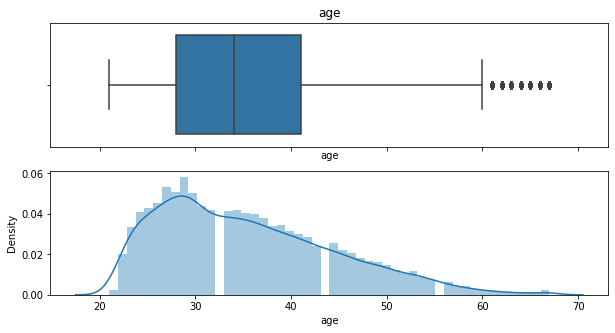

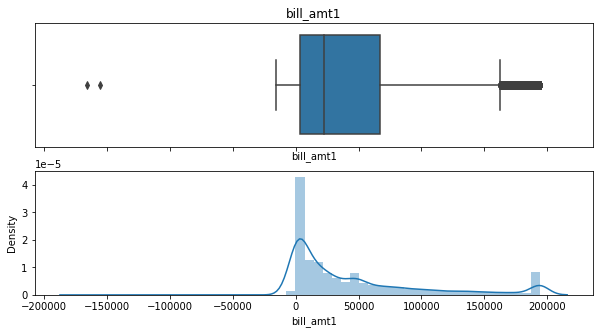

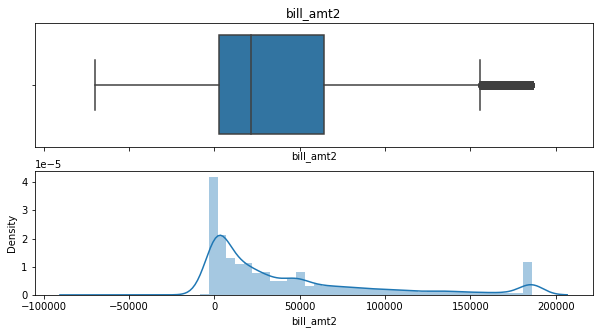

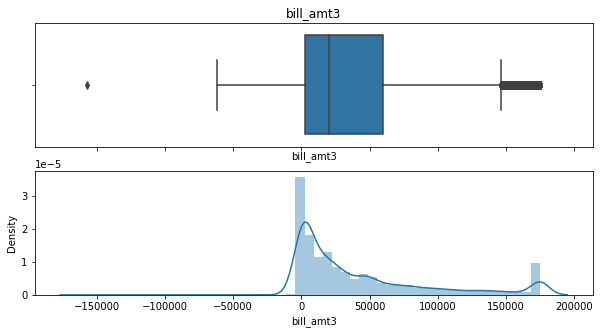

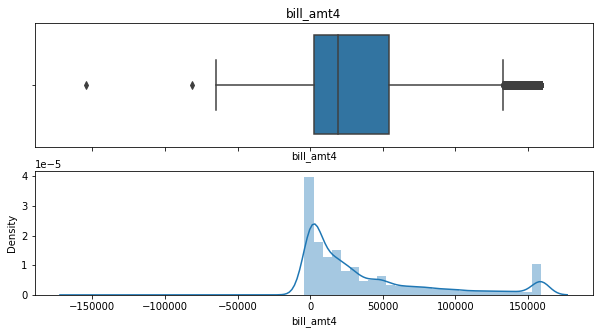

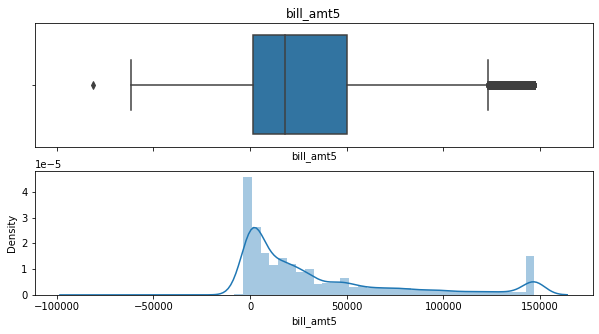

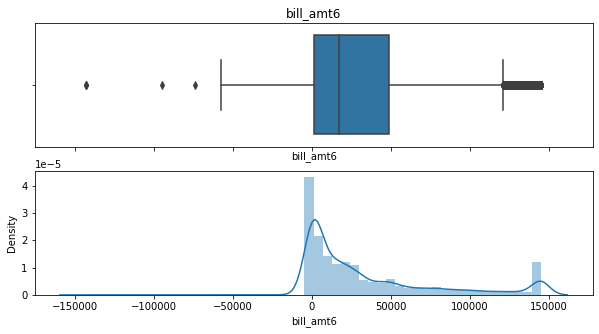

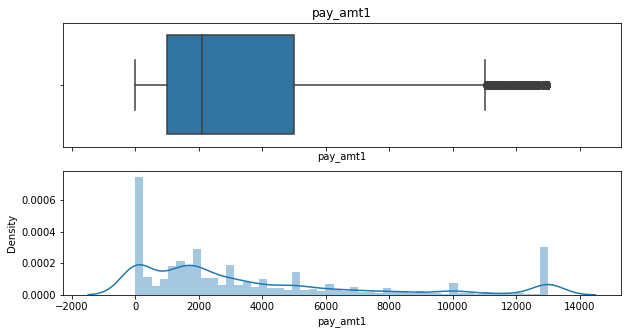

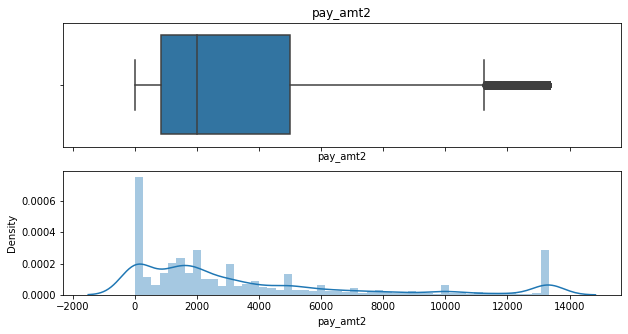

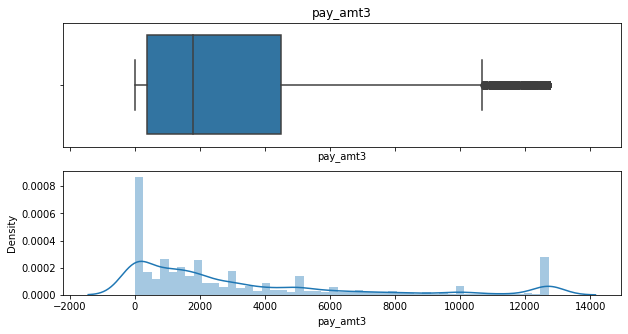

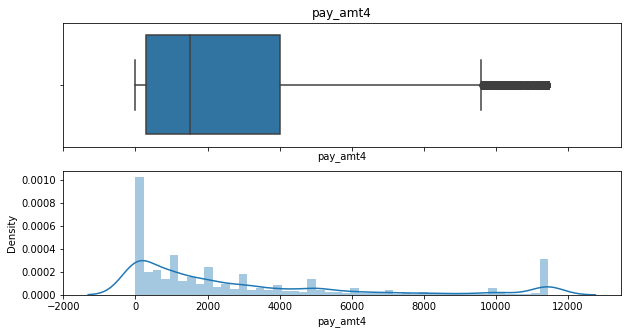

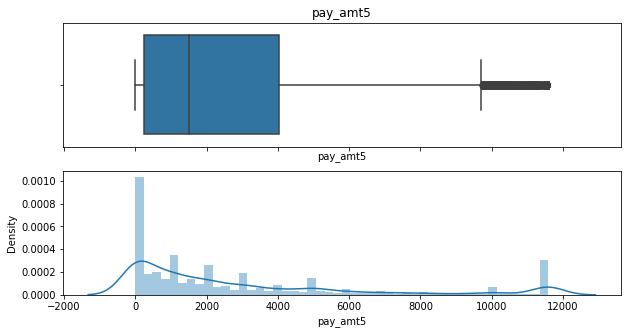

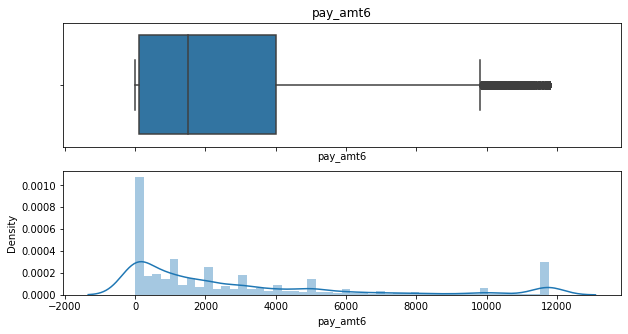

In [ ]:
# checking the distribution of treated non_symmetric_feature
for i in non_symmetric_feature:
  plotting(df_feature[i])

#### <b> Heatmap Plot </b>
Obtaining correlation between the dependent variable and other numerical features by making use of heatmap plots of all the numerical features

In [ ]:
# Correlation Heatmap visualization code
corr = df_feature.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,dp_next_month,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
dp_next_month,1.00,-0.15,0.01,-0.03,-0.02,-0.02,-0.02,-0.01,-0.01,-0.14,-0.14,-0.12,-0.11,-0.11,-0.11
limit_bal,-0.15,1.00,0.14,0.22,0.22,0.22,0.23,0.23,0.23,0.35,0.36,0.36,0.35,0.36,0.37
age,0.01,0.14,1.00,0.04,0.04,0.04,0.03,0.03,0.03,0.04,0.05,0.04,0.05,0.04,0.04
bill_amt1,-0.03,0.22,0.04,1.00,0.95,0.90,0.85,0.82,0.80,0.45,0.41,0.38,0.39,0.38,0.37
bill_amt2,-0.02,0.22,0.04,0.95,1.00,0.94,0.89,0.85,0.82,0.53,0.42,0.39,0.39,0.39,0.37
bill_amt3,-0.02,0.22,0.04,0.90,0.94,1.00,0.93,0.89,0.86,0.49,0.51,0.40,0.41,0.41,0.39
bill_amt4,-0.02,0.23,0.03,0.85,0.89,0.93,1.00,0.94,0.90,0.47,0.47,0.49,0.42,0.42,0.40
bill_amt5,-0.01,0.23,0.03,0.82,0.85,0.89,0.94,1.00,0.94,0.45,0.44,0.45,0.51,0.43,0.41
bill_amt6,-0.01,0.23,0.03,0.80,0.82,0.86,0.90,0.94,1.00,0.43,0.42,0.43,0.47,0.51,0.41
pay_amt1,-0.14,0.35,0.04,0.45,0.53,0.49,0.47,0.45,0.43,1.00,0.53,0.50,0.48,0.47,0.45


#### <b>One-hot-encoding for categorical variables</b>

We will one-hot-encode all of the categorical variables, excluding the target variable dp_next_month.

In [ ]:
# Make a list of categorical columns
cols=['sex', 'education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

# Column 'sex' is binary so we need not to do one hot encoding for binary variables
# We might need to do label encoding for binary columns but column 'sex' is already encoded
# with values (1=male, 2=female)

cols = ['education', 'marriage', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [ ]:
# check the datatypes of each column in the DataFrame
df_feature.dtypes

dp_next_month       int64
limit_bal           int64
sex              category
education        category
marriage         category
age                 int64
pay_1            category
pay_2            category
pay_3            category
pay_4            category
pay_5            category
pay_6            category
bill_amt1         float64
bill_amt2         float64
bill_amt3         float64
bill_amt4         float64
bill_amt5         float64
bill_amt6         float64
pay_amt1            int64
pay_amt2            int64
pay_amt3            int64
pay_amt4          float64
pay_amt5          float64
pay_amt6          float64
dtype: object

In [ ]:
# Cast values in the categorical columns as type str.
df_feature[cols] = df_feature[cols].astype(str)

In [ ]:
# check it again to make sure
df_feature.dtypes

dp_next_month       int64
limit_bal           int64
sex              category
education          object
marriage           object
age                 int64
pay_1              object
pay_2              object
pay_3              object
pay_4              object
pay_5              object
pay_6              object
bill_amt1         float64
bill_amt2         float64
bill_amt3         float64
bill_amt4         float64
bill_amt5         float64
bill_amt6         float64
pay_amt1            int64
pay_amt2            int64
pay_amt3            int64
pay_amt4          float64
pay_amt5          float64
pay_amt6          float64
dtype: object

In [ ]:
# One-hot-encode the categorical variables
df_feature = pd.get_dummies(df_feature, columns=cols, drop_first=True)
df_feature.head(3)

,dp_next_month,limit_bal,sex,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,pay_1_-2,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay_2_-2,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_2_4,pay_2_5,pay_2_6,pay_2_7,pay_2_8,pay_3_-2,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_3_4,pay_3_5,pay_3_6,pay_3_7,pay_3_8,pay_4_-2,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_4_4,pay_4_5,pay_4_6,pay_4_7,pay_4_8,pay_5_-2,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8,pay_6_-2,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,1,20000,2,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0,689,0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,120000,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0,1000,1000,1000.0,0.0,2000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,90000,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518,1500,1000,1000.0,1000.0,5000.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# checking the shape of the our data after one hot encoding
df_feature.shape

(30000, 80)

#### <b> Data Splitting </b>


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
# split into 70:30 ratio

X_train,X_test,y_train,y_test = train_test_split(df_feature.drop("dp_next_month",axis=1),df_feature["dp_next_month"],test_size = 0.3,random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (21000, 79)
Number transactions y_train dataset:  (21000,)
Number transactions X_test dataset:  (9000, 79)
Number transactions y_test dataset:  (9000,)


##### What data splitting ratio have you used and why? 

There are two competing concerns: with less training data, your parameter estimates have greater variance. With less testing data, your performance statistic will have greater variance. Broadly speaking you should be concerned with dividing data such that neither variance is too high, which is more to do with the absolute number of instances in each category rather than the percentage.

If you have a total of 100 instances, you're probably stuck with cross validation as no single split is going to give you satisfactory variance in your estimates. If you have 100,000 instances, it doesn't really matter whether you choose an 80:20 split or a 90:10 split (indeed you may choose to use less training data if your method is particularly computationally intensive).

You'd be surprised to find out that 80/20 is quite a commonly occurring ratio, often referred to as the Pareto principle. It's usually a safe bet if you use that ratio.

In this case the training dataset is small, that's why I have taken 70:30 ratio.

#### <b> Handling Imbalanced Data (Dependent Variable) </b>

In [ ]:
df_feature['dp_next_month'].value_counts()

0    23364
1     6636
Name: dp_next_month, dtype: int64

0    23364
1     6636
Name: dp_next_month, dtype: int64
 


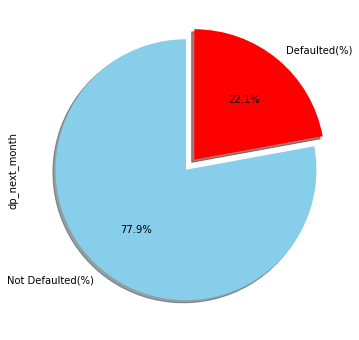

In [ ]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df_feature.dp_next_month.value_counts())
print(" ")
# Dependant Variable Column Visualization
df_feature['dp_next_month'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Defaulted(%)','Defaulted(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0.1]
                              )

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced dataset is relevant primarily in the context of supervised machine learning involving two or more classes.

Imbalance means that the number of data points available for different the classes is different:
If there are two classes, then balanced data would mean 50% points for each of the class. For most machine learning techniques, little imbalance is not a problem. So, if there are 60% points for one class and 40% for the other class, it should not cause any significant performance degradation. Only when the class imbalance is high, e.g. 90% points for one class and 10% for the other, standard optimization criteria or performance measures may not be as effective and would need modification.

In our case the dataset dependent column data ratio is 78:22. So, during model creating it's obvios that there will be bias and having a great chance of predicting the majority one so frequently. SO the dataset should be balanced before it going for the model creation part.

In [ ]:
# Handling Imbalanced Dataset 
# Handaling imbalance dataset using SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (32608, 79)
Number transactions y_train dataset:  (32608,)
Number transactions X_test dataset:  (9000, 79)
Number transactions y_test dataset:  (9000,)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the 78:22 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE. 

To address this disparity, balancing schemes that augment the data to make it more balanced before training the classifier were proposed. Oversampling the minority class by duplicating minority samples or undersampling the majority class is the simplest balancing method. 

The idea of incorporating synthetic minority samples into tabular data was first proposed in SMOTE, where synthetic minority samples are generated by interpolating pairs of original minority points.

SMOTE is a data augmentation algorithm that creates synthetic data points from raw data. SMOTE can be thought of as a more sophisticated version of oversampling or a specific data augmentation algorithm. 

SMOTE has the advantage of not creating duplicate data points, but rather synthetic data points that differ slightly from the original data points. SMOTE is a superior oversampling option.

That's why for lots of advantages, I have used SMOTE technique for balancinmg the dataset.


#### **Evaluation Metrics Used -**

* The mean squared error (MSE):- It tells you how close a regression line is to a set of points.

* Root Mean Square Error (RMSE):- It is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE):- These are metrics used to evaluate a Regression Model. ... Here, errors are the absolute differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2):- It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Adjusted R-squared:- It is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


## **7. ML Model Implementation**

#### **1st Model - Logistic Regression**

Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. 

The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [ ]:
# Copying the processed data to save all the work done till now
df_model = df_feature.copy()
df_model.head(3)

,dp_next_month,limit_bal,sex,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,education_2,education_3,education_4,marriage_1,marriage_2,marriage_3,pay_1_-2,pay_1_0,pay_1_1,pay_1_2,pay_1_3,pay_1_4,pay_1_5,pay_1_6,pay_1_7,pay_1_8,pay_2_-2,pay_2_0,pay_2_1,pay_2_2,pay_2_3,pay_2_4,pay_2_5,pay_2_6,pay_2_7,pay_2_8,pay_3_-2,pay_3_0,pay_3_1,pay_3_2,pay_3_3,pay_3_4,pay_3_5,pay_3_6,pay_3_7,pay_3_8,pay_4_-2,pay_4_0,pay_4_1,pay_4_2,pay_4_3,pay_4_4,pay_4_5,pay_4_6,pay_4_7,pay_4_8,pay_5_-2,pay_5_0,pay_5_2,pay_5_3,pay_5_4,pay_5_5,pay_5_6,pay_5_7,pay_5_8,pay_6_-2,pay_6_0,pay_6_2,pay_6_3,pay_6_4,pay_6_5,pay_6_6,pay_6_7,pay_6_8
0,1,20000,2,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0,689,0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,120000,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0,1000,1000,1000.0,0.0,2000.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,90000,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518,1500,1000,1000.0,1000.0,5000.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# checking the shape of our model dataframe
df_model.shape

(30000, 80)

In [ ]:

# splitting the data
X = df_model.drop(['dp_next_month'],axis=1)
y = df_model['dp_next_month']

In [ ]:
# creating a variable for columns
columns = X.columns
columns

Index(['limit_bal', 'sex', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3',
       'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2',
       'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'education_2',
       'education_3', 'education_4', 'marriage_1', 'marriage_2', 'marriage_3',
       'pay_1_-2', 'pay_1_0', 'pay_1_1', 'pay_1_2', 'pay_1_3', 'pay_1_4',
       'pay_1_5', 'pay_1_6', 'pay_1_7', 'pay_1_8', 'pay_2_-2', 'pay_2_0',
       'pay_2_1', 'pay_2_2', 'pay_2_3', 'pay_2_4', 'pay_2_5', 'pay_2_6',
       'pay_2_7', 'pay_2_8', 'pay_3_-2', 'pay_3_0', 'pay_3_1', 'pay_3_2',
       'pay_3_3', 'pay_3_4', 'pay_3_5', 'pay_3_6', 'pay_3_7', 'pay_3_8',
       'pay_4_-2', 'pay_4_0', 'pay_4_1', 'pay_4_2', 'pay_4_3', 'pay_4_4',
       'pay_4_5', 'pay_4_6', 'pay_4_7', 'pay_4_8', 'pay_5_-2', 'pay_5_0',
       'pay_5_2', 'pay_5_3', 'pay_5_4', 'pay_5_5', 'pay_5_6', 'pay_5_7',
       'pay_5_8', 'pay_6_-2', 'pay_6_0', 'pay_6_2', 'pay_6_3', 'pay_6_4',
       'pay_6_5', 'pay_6_6', 'pay_6_7', 'pay_

In [ ]:
# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
# making a grid 
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [ ]:
#import the packages
from sklearn.linear_model import LogisticRegression


# fit model
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'roc_auc', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=3)

In [ ]:
# best grid
optimized_clf = grid_lr_clf.best_estimator_
grid_lr_clf.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [ ]:
# best score
grid_lr_clf.best_score_

0.7757895866190031

In [ ]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.819502487562189
The accuracy on test data is  0.8123232323232323


In [ ]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.8123232323232323
The precision on test data is  0.30273972602739724
The recall on test data is  0.6670020120724346
The f1 on test data is  0.41645728643216073
The roc_score on test data is  0.747772283826471


[[15029   625]
 [ 3003  1443]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

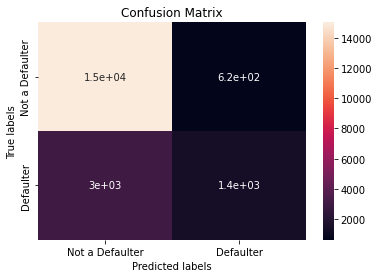

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# top 10 important features
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

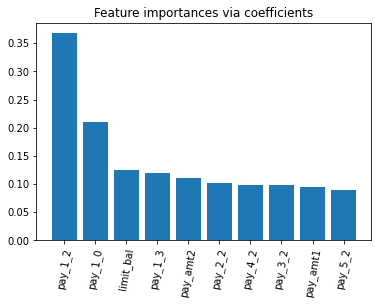

In [ ]:
# plotting the bar chart for it
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [ ]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

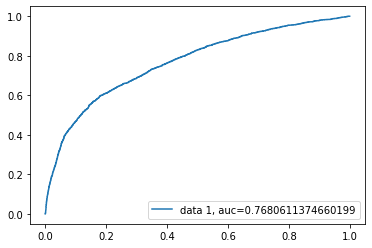

In [ ]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

#### **2nd Model - Support Vector Classifier** 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10],   
              'kernel': ['rbf']} 

In [ ]:
# splitting the data
X = df_model.drop(['dp_next_month'],axis=1)
y = df_model['dp_next_month']

In [ ]:
# scaling the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
# import the packages
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [ ]:
# best estimator
optimal_SVC_clf = grid_clf.best_estimator_
optimal_SVC_clf

SVC(C=1, probability=True)

In [ ]:
# best CV
grid_clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
# best score
grid_clf.best_score_

0.822089552238806

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.819502487562189
The accuracy on test data is  0.8123232323232323


In [ ]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.8180808080808081
The precision on test data is  0.3634703196347032
The recall on test data is  0.6616791354945969
The f1 on test data is  0.4692012967875037
The roc_score on test data is  0.7506969898468729


We can see from above results that we are getting around 80% train accuracy and 78% for test accuracy which is not bad. But f1- score is 76% approx, so there might be more ground for improvement.

[[14954   700]
 [ 2718  1728]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

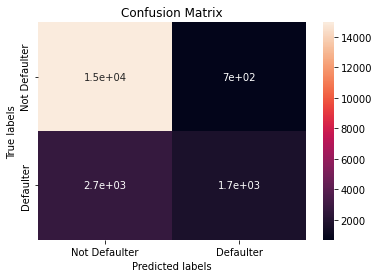

In [ ]:
  # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Optimum SVC
optimal_SVC_clf

SVC(C=1, probability=True)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [ ]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

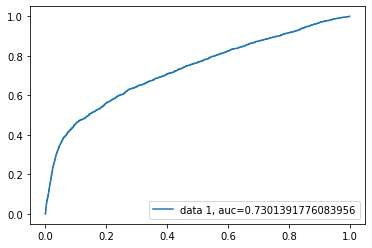

In [ ]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented SVC and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

#### **3rd Model - Decision Tree** 

In [ ]:
# making grid
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [ ]:
# importing packages
from sklearn.tree import DecisionTreeClassifier  

In [ ]:
# splitting the data
X = df_model.drop(['dp_next_month'],axis=1)
y = df_model['dp_next_month']

In [ ]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
# fit the model
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [ ]:
# best decision tree model score
grid_DTC_clf.best_score_

0.8144278606965174

In [ ]:
# best estimator
optimal_DTC_clf = grid_DTC_clf.best_estimator_

In [ ]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [ ]:
# best grid
grid_DTC_clf.best_params_

{'max_depth': 20, 'min_samples_split': 0.2}

In [ ]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.8159203980099502
The accuracy on test data is  0.8127272727272727


In [ ]:
# other metric scores
test_accuracy_dtc = accuracy_score(test_class_preds,y_test)
test_precision_score_dtc = precision_score(test_class_preds,y_test)
test_recall_score_dtc = recall_score(test_class_preds,y_test)
test_f1_score_dtc = f1_score(test_class_preds,y_test)
test_roc_score_dtc = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.8123232323232323
The precision on test data is  0.30273972602739724
The recall on test data is  0.6670020120724346
The f1 on test data is  0.41645728643216073
The roc_score on test data is  0.747772283826471


[[15045   609]
 [ 3091  1355]]


[Text(0, 0.5, 'Not a Defaulter'), Text(0, 1.5, 'Defaulter')]

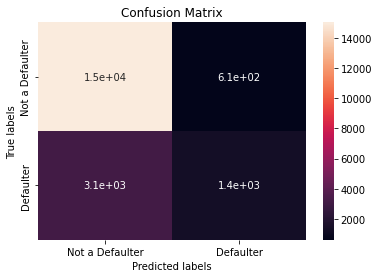

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not a Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
y_preds_proba_dtc = optimal_DTC_clf.predict_proba(X_test)[::,1]

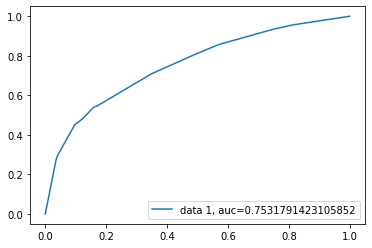

In [ ]:
y_pred_proba = y_preds_proba_dtc
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented decision tree classifier and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

#### **4th Model - Random Forest** 

In [ ]:
# import package
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# splitting the data
X = df_model.drop(['dp_next_month'],axis=1)
y = df_model['dp_next_month']

In [ ]:
# fit the model 
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994029850746269
The accuracy on test data is  0.8124242424242424


In [ ]:
# other measures
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8124242424242424
The precision on test data is  0.35662100456621004
The recall on test data is  0.6354759967453214
The f1 on test data is  0.4568587306229892
The roc_score on test data is  0.736490160753009


We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.

In [ ]:
# making grid
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [ ]:
# fit the model
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [ ]:
# best score
grid_rf_clf.best_score_

0.8212935323383084

In [ ]:
# best grid
grid_rf_clf.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [ ]:
# storing the best param values
optimal_rf_clf = grid_rf_clf.best_estimator_
optimal_rf_clf

RandomForestClassifier(max_depth=10, n_estimators=200)

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.85318407960199
The accuracy on test data is  0.8161616161616162


In [ ]:
# other measures
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8161616161616162
The precision on test data is  0.33470319634703194
The recall on test data is  0.6687956204379562
The f1 on test data is  0.4461351186853317
The roc_score on test data is  0.7516513313457386


In [ ]:
len(optimal_rf_clf.feature_importances_)

79

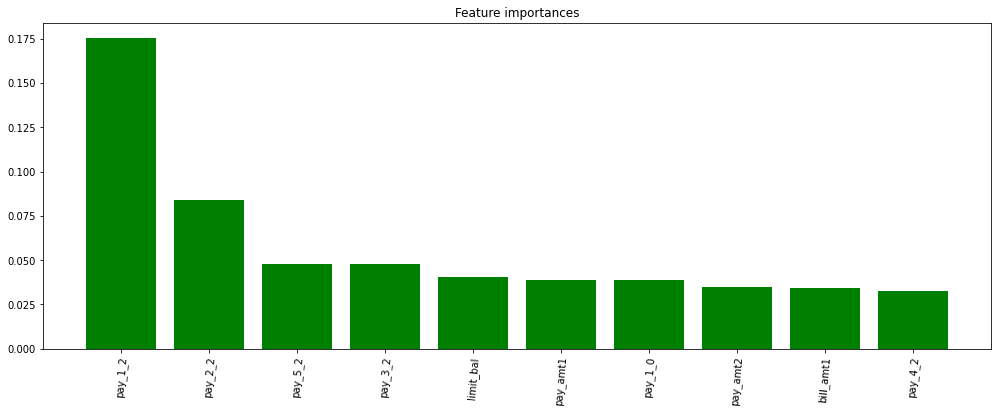

In [ ]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [ ]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

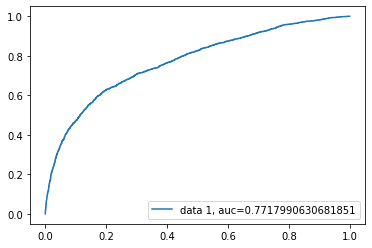

In [ ]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

We have implemented random forest model and we getting f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

#### **5th Model - XGBoost** 

In [ ]:
# splitting the data
X = df_model.drop(['dp_next_month'],axis=1)
y = df_model['dp_next_month']
     

NameError: ignored

In [ ]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [ ]:
# import package
import xgboost

In [ ]:
# fit the model
xgb_model = xgboost.XGBClassifier(eta=0.1, nrounds=1000, max_depth=8, colsample_bytree=0.5, scale_pos_weight=1.1, booster='gbtree', 
                                  metric='multi:softmax')
hr_pred = xgb_model.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C')).predict(X_test._get_numeric_data())

In [ ]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

#### **6th Model - XGBoost** 

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 37.49870759231109
RMSE : 6.123618831402808
MAE : 4.631941930070968
R2 : 0.7572206937827596
Adjusted R2 : 0.7524714013462789


Our r2 score appears to be 0.757, indicating that our model can account for the majority of the variance in the data. Let's store it in a dataframe so that we can compare it later.

In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# performance on test dataset
#import the packages
from sklearn.metrics import mean_squared_error

#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )


MSE : 39.75328509745072
RMSE : 6.305020626251014
MAE : 4.780139380147357
R2 : 0.7462667990840166
Adjusted R2 : 0.741303224590085


The r2_score for the test set is 0.746. This indicates that our linear model works well with the test data. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter—is present.

In [ ]:
# storing the value of the test set metrics in a dataframe for comparing later
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),2),
       'MSE':round((MSE_lr),2),
       'RMSE':round((RMSE_lr),2),
       'R2_score':round((r2_lr),2),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

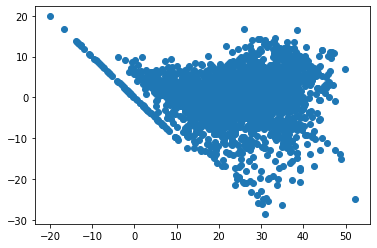

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

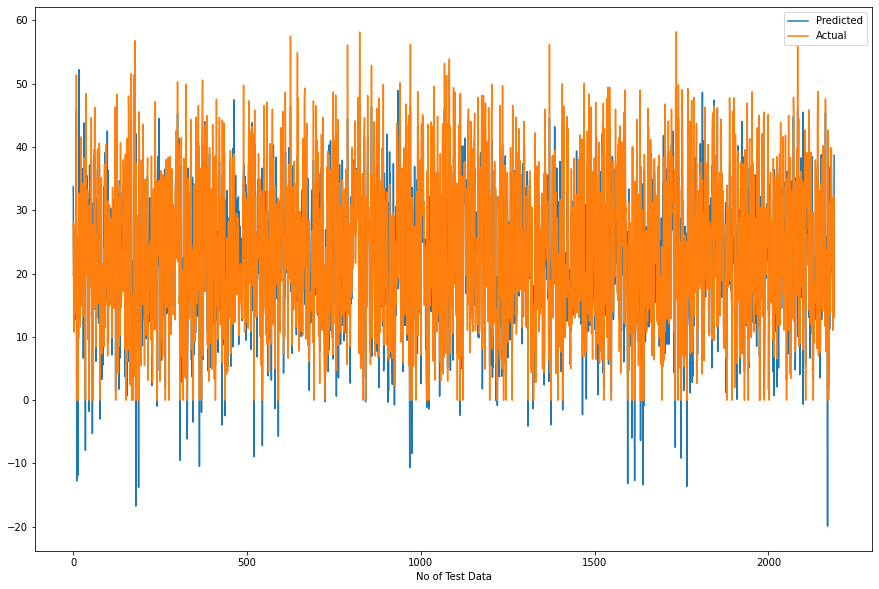

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

#### **2nd Model -Lasso (Regularization Model)** 

In [ ]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.4531383891444809 0.456976838882418


In [ ]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 83.87315645584718
RMSE : 9.158228892959992
MAE : 6.791020865571764
R2 : 0.456976838882418
Adjusted R2 : 0.4463541221768109


Our r2 score appears to be 0.456, indicating that our model is unable to account for the majority of the variance in the data. Let's save it in a dataframe so that we can compare it later.

In [ ]:
# storing the value of the test set metrics in a dataframe to compare later
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),2),
       'MSE':round((MSE_l),2),
       'RMSE':round((RMSE_l),2),
       'R2_score':round((r2_l),2),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 85.67875802894649
RMSE : 9.256282084560004
MAE : 6.944204612053192
R2 : 0.4531383891444809
Adjusted R2 : 0.44244058399500175


The test set has an R2 score of 0.45. This indicates that the test data do not support our linear model's predictions. Let's try to visualize our residuals to see if heteroscedasticity—also known as unequal variance or scatter is present.

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

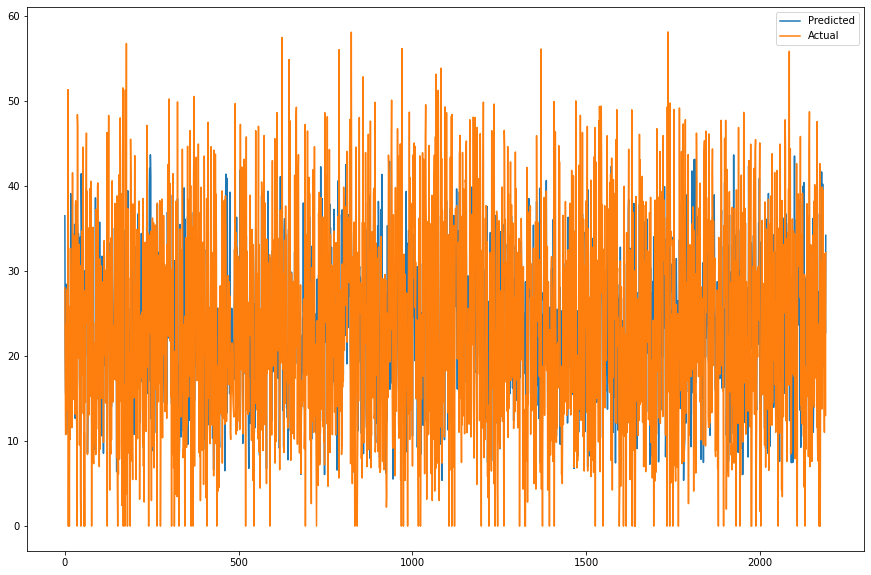

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

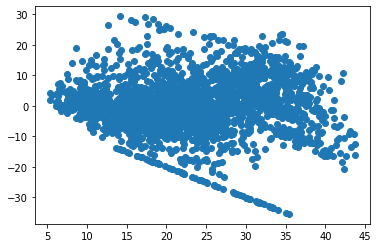

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### **3rd Model -Ridge (Regularization Model)**

In [ ]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)

In [ ]:
# Fit the model
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# check the score
ridge.score(X_train, y_train)

0.7572206057354925

In [ ]:
# get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


# import the packages
from sklearn.metrics import r2_score
# calculate R2 and adjusted R2 score
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 37.49872119173508
RMSE : 6.123619941810161
MAE : 4.632035255522214
R2 : 0.7572206057354925
Adjusted R2 : 0.7524713115766154


Looks like our r2 score value is 0.757 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare later.

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

# calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

# calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 39.751795604679025
RMSE : 6.304902505564938
MAE : 4.780231222524114
R2 : 0.7462763060660882
Adjusted R2 : 0.7413129175494491


The r2_score for the test set is 0.746. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare later
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

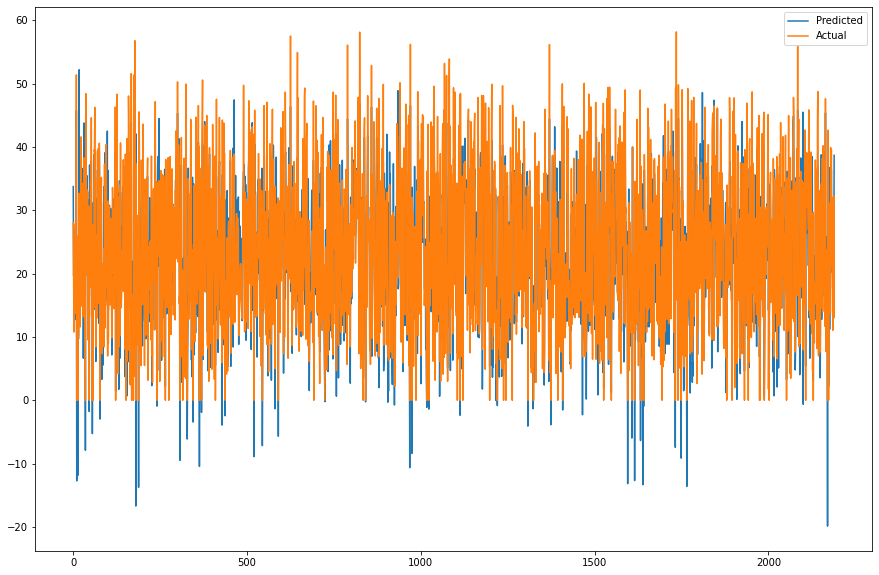

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

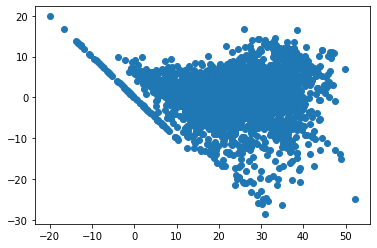

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#### **4th Model -Elastic Net (Regularization Model)**

In [ ]:
# import the packages
from sklearn.linear_model import ElasticNet
# a * L1 + b * L2
# alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
# Fit the model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
# check the score
elasticnet.score(X_train, y_train)

0.6279010249947612

In [ ]:
# get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.47289946794181
RMSE : 7.581088277281951
MAE : 5.73828610026378
R2 : 0.6279010249947612
Adjusted R2 : 0.6206219579476164


Looks like our r2 score value is 0.627 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

# calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)

# calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 58.48835705215875
RMSE : 7.647768109204067
MAE : 5.858671650946587
R2 : 0.6266864986181269
Adjusted R2 : 0.6193836727876478


The r2_score for the test set is 0.626. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [ ]:
# storing the test set metrics value in a dataframe to compare it
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),2),
       'MSE':round((MSE_e),2),
       'RMSE':round((RMSE_e),2),
       'R2_score':round((r2_e),2),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

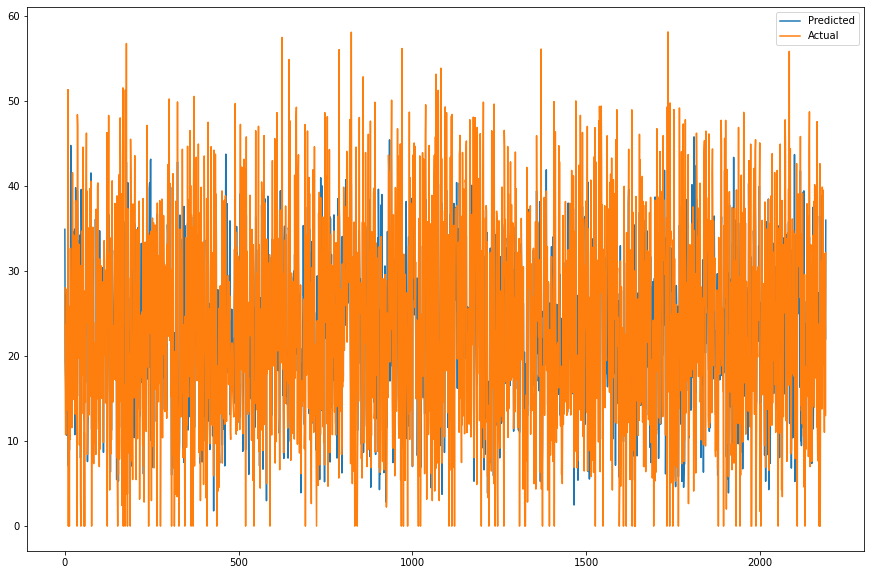

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

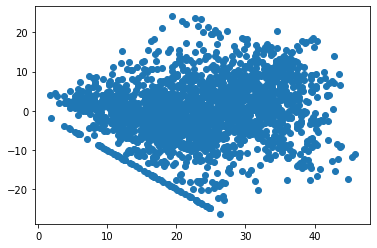

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

#### **5th Model - Decision Tree**

In [ ]:
# import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [ ]:
# get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

# calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.7435732774773345
MSE : 39.606632198413
RMSE : 6.293380029714796
MAE : 4.52577751410227
R2 : 0.7435732774773345
Adjusted R2 : 0.7385570118294762


Looks like our r2 score value is 0.733 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

# calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

# calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 45.820490861128704
RMSE : 6.769083457982233
MAE : 4.833090571844648
R2 : 0.7075416588783676
Adjusted R2 : 0.7018205362295048


The r2_score for the test set is 0.718. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),2),
       'MSE':round((MSE_d),2),
       'RMSE':round((RMSE_d),2),
       'R2_score':round((r2_d),2),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

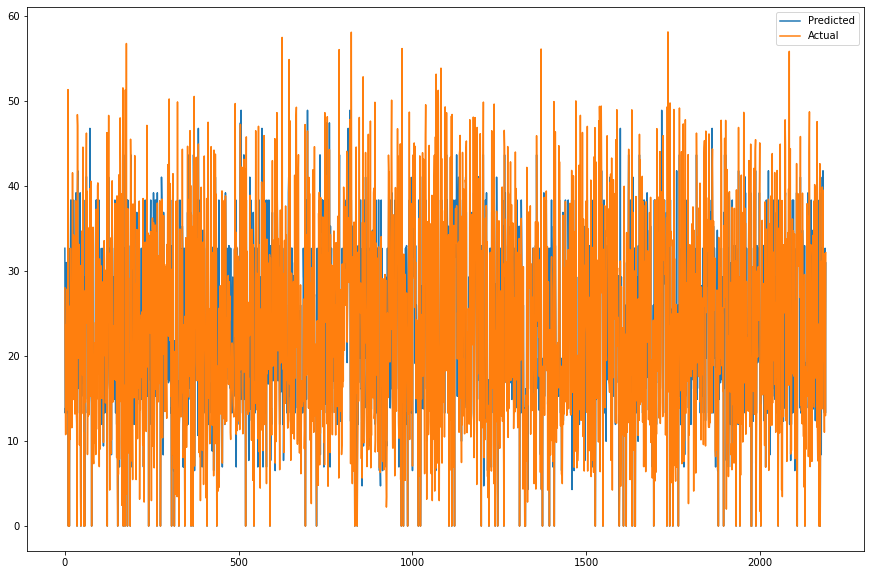

In [ ]:
# Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

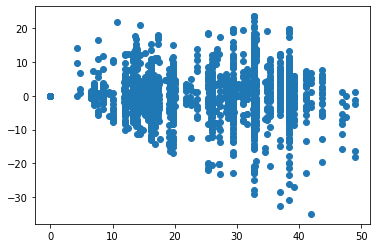

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

#### **6th Model - Random Forest**

In [ ]:
# import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

# calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9882563829622338
MSE : 1.8138714877998239
RMSE : 1.3468004632460682
MAE : 0.8164204669540243
R2 : 0.9882563829622338
Adjusted R2 : 0.9880266522144061


Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

# calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

# calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.235830578432305
RMSE : 3.497975211237539
MAE : 2.1713307435613927
R2 : 0.9219023924457909
Adjusted R2 : 0.9203746330059787


The r2_score for the test set is 0.922. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),2),
       'MSE':round((MSE_rf),2),
       'RMSE':round((RMSE_rf),2),
       'R2_score':round((r2_rf),2),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

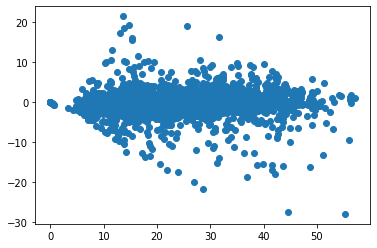

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([2.24658364e-01, 3.06974943e-01, 1.54493543e-01, 1.68950199e-02,
       3.73093905e-02, 1.59724927e-01, 1.93714895e-02, 2.42377685e-02,
       1.44744127e-04, 1.66809471e-04, 2.07797451e-03, 1.12108565e-03,
       1.22661737e-03, 3.23148366e-03, 9.23209579e-04, 2.46294463e-03,
       1.41033868e-03, 1.95253886e-03, 7.95469753e-03, 3.97611574e-04,
       3.28036004e-04, 1.14621703e-03, 6.08489189e-04, 4.30808318e-04,
       4.47978884e-04, 1.17451224e-03, 1.23387755e-03, 1.13885107e-02,
       4.45918531e-04, 9.90670744e-04, 2.99531860e-04, 3.91266954e-04,
       1.46017481e-04, 1.75441189e-04, 4.24921861e-04, 7.98945586e-04,
       1.05132923e-03, 9.23655393e-03, 9.70371135e-04, 4.41528470e-04,
       6.82699180e-04, 4.50872429e-04])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.31
0,hour,0.22
5,functioning_day,0.16
2,humidity,0.15
4,solar_radiation,0.04
3,visibility,0.02
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01


In [ ]:
# FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

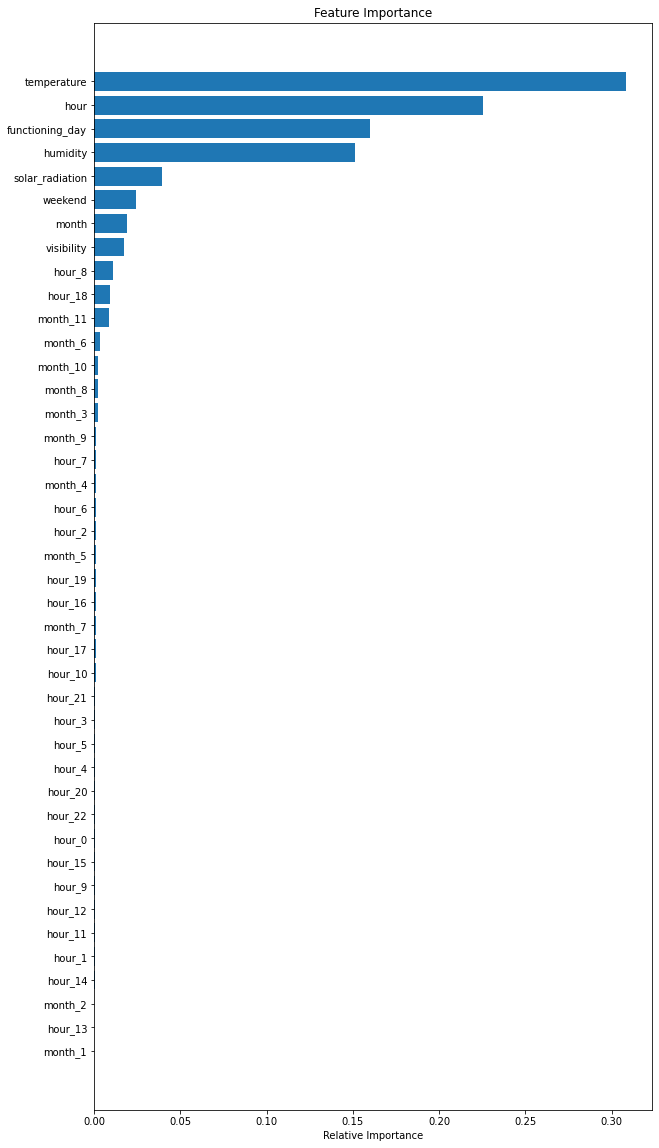

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **7th Model - Gradient Boosting (Ensemble Method)**

In [ ]:
# import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
# calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8943871545179984
MSE : 16.312532037544287
RMSE : 4.038877571497345
MAE : 2.8541015996926724
R2 : 0.8943871545179984
Adjusted R2 : 0.8923211370469951


Looks like our r2 score value is 0.894 that means our model is  able to capture most of the data variance. Lets save it in a dataframe to compare it later.

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# import the packages
from sklearn.metrics import mean_squared_error
# calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

# calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

# calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)

# import the packages
from sklearn.metrics import r2_score
# calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 18.088279571260106
RMSE : 4.253031809340262
MAE : 3.0709811628901478
R2 : 0.8845479797851137
Adjusted R2 : 0.8822894866090423


The r2_score for the test set is 0.884. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter)

In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

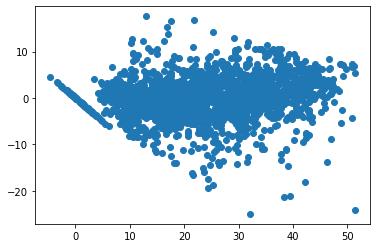

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [ ]:
gb_model.feature_importances_

array([2.12907077e-01, 3.20070987e-01, 1.50574303e-01, 1.91370087e-03,
       3.61983615e-02, 1.83237729e-01, 2.05365286e-02, 1.88063821e-02,
       0.00000000e+00, 1.10463629e-04, 3.13943455e-04, 0.00000000e+00,
       3.41013448e-04, 4.12161397e-03, 5.51676228e-04, 2.53306152e-03,
       0.00000000e+00, 3.90493835e-03, 9.91775349e-03, 9.83257590e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.74722879e-03,
       2.17936913e-03, 6.12613324e-04, 5.73411578e-04, 1.28526788e-02,
       0.00000000e+00, 1.57327413e-03, 7.41551729e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.14569556e-02, 2.40126385e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [ ]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.21
1,temperature,0.32
2,humidity,0.15
3,visibility,0.00
4,solar_radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.21
5,functioning_day,0.18
2,humidity,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
27,hour_8,0.01
37,hour_18,0.01
18,month_11,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

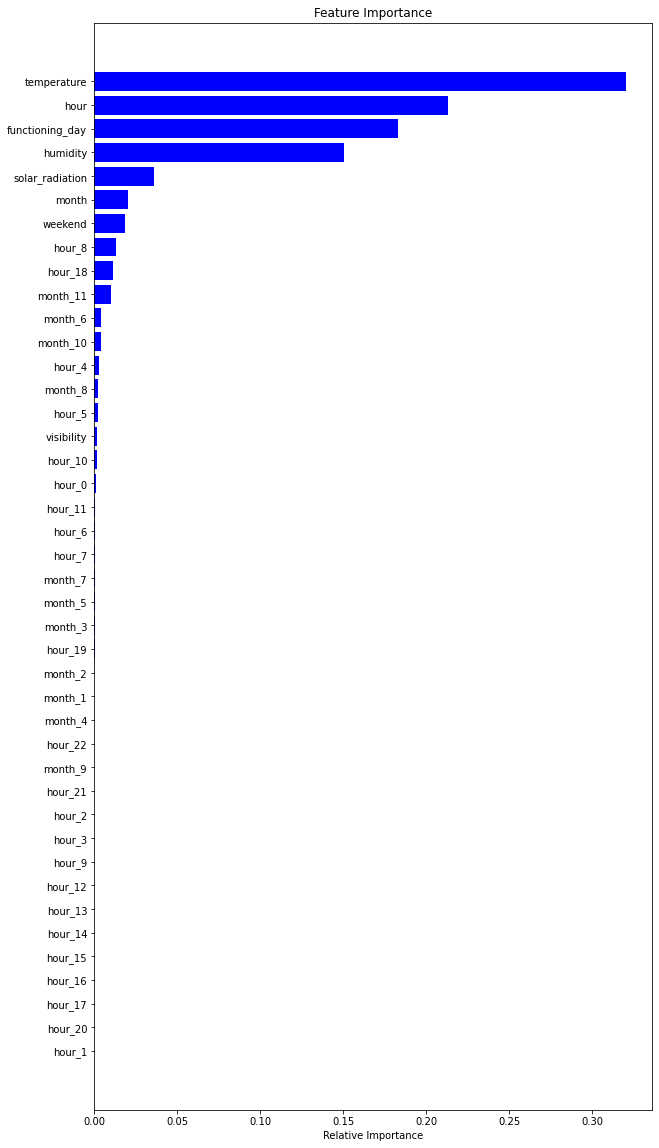

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### **8th Model Gradient Boosting Regressor with GridSearchCV**

##### Hyperparameter tuning

Let's try adjusting some hyperparameters to see if our model performs better before moving on to the next models.

The process of selecting the best hyperparameters for a learning algorithm is known as hyperparameter tuning. A model argument is a hyperparameter whose value is set before learning begins. Hyperparameter tuning is the key to machine learning algorithmic success.

##### Using GridSearch CV

GridSearch CV makes it easier to fit the model to the training set by looping through predefined hyperparameters. Thus, in the end, we can select the optimal hyperparameters from the list.

##### Provide the range of values for chosen hyperparameter

In [ ]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=40,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [ ]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

##### Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9510500265382631
MSE : 7.5606144942624915
RMSE : 2.7496571594041486
MAE : 1.7595796450321235
R2 : 0.9510500265382631
Adjusted R2 : 0.950092458356897


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.23250966406451
RMSE : 3.4975004880720904
MAE : 2.2195785730538615
R2 : 0.9219235888382511
Adjusted R2 : 0.920396244046079


In [ ]:
# storing the test set metrics value in a dataframe to compare it later
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

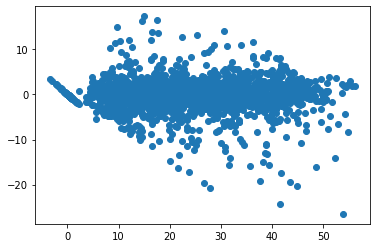

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [ ]:
gb_optimal_model.feature_importances_

array([2.29429700e-01, 3.20673698e-01, 1.64171005e-01, 8.48103539e-03,
       3.73729579e-02, 1.54636015e-01, 2.04451456e-02, 1.85834996e-02,
       1.04725446e-06, 8.78372630e-05, 6.73428821e-04, 3.36342035e-04,
       4.95153707e-04, 2.37798977e-03, 8.07630555e-04, 2.13672164e-03,
       2.02488290e-04, 1.82409295e-03, 8.77718200e-03, 6.18075825e-04,
       9.61380320e-05, 9.09453617e-04, 4.70657980e-04, 6.37473130e-04,
       5.25061911e-04, 1.05814412e-03, 9.24531059e-04, 1.12714459e-02,
       1.57494186e-04, 1.02695464e-03, 4.69749633e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.34044366e-06, 0.00000000e+00,
       9.40201627e-04, 9.20451813e-03, 3.74999241e-04, 8.92946385e-06,
       4.75862744e-05, 1.64048864e-04])

In [ ]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.head()

,Feature,Feature Importance
0,hour,0.23
1,temperature,0.32
2,humidity,0.16
3,visibility,0.01
4,solar_radiation,0.04


In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,temperature,0.32
0,hour,0.23
2,humidity,0.16
5,functioning_day,0.15
4,solar_radiation,0.04
6,month,0.02
7,weekend,0.02
3,visibility,0.01
27,hour_8,0.01
37,hour_18,0.01


In [ ]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

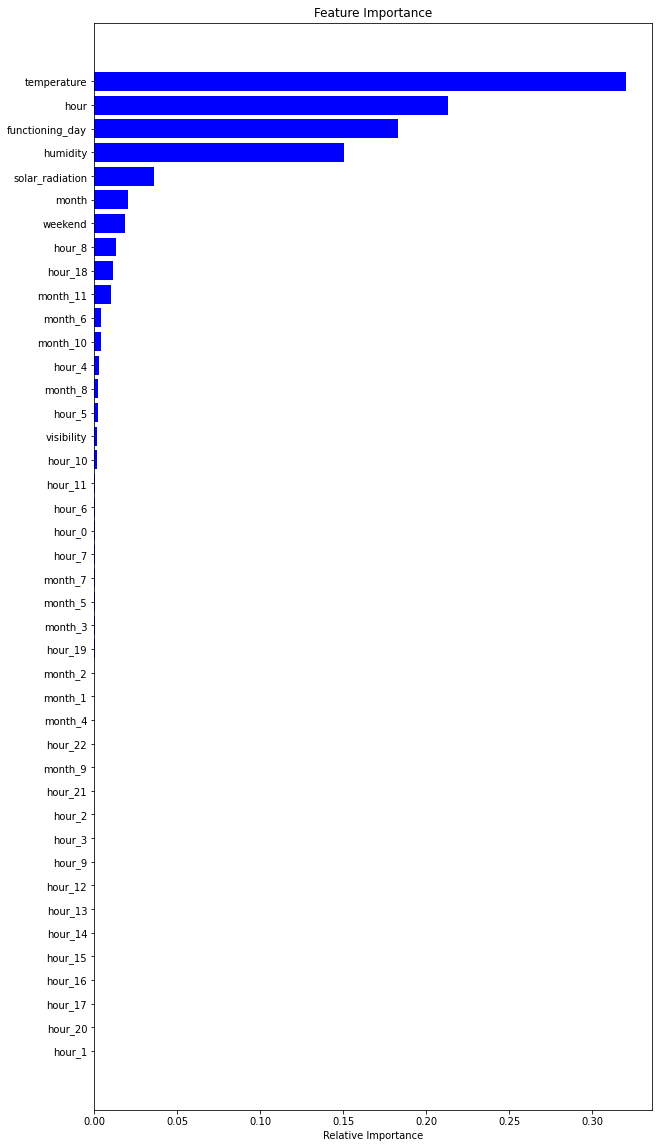

In [ ]:
# Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **8. Final Verdict**

#### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The R square is calculated by replacing the calculated prediction with the mean by dividing the sum of the squared prediction error by the total sum of the squares. The R Square worth reaches from 0 to 1, and a higher worth shows that the forecast and genuine worth are all the more firmly adjusted.


The fit of the model to the dependent variables can be evaluated using the R square measure. On the other hand, overfitting is not taken into consideration. If there are a lot of independent variables in the regression model, it may work well with training data but fail with testing data because it is too complicated. Adjusted R Square is a new metric that penalizes additional independent variables added to the model and adjusts the metric to prevent overfitting.

Because it estimates the relationship between the movements of a dependent variable and those of an independent variable, R square is the best evaluation method for predicting the rented_bike_count. 

#### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose the Random Forest model because, first and foremost, I need a better prediction for the number of rented bikes, and time is not a constraint because the data is different from that of Zomato or Uber, where real-time booking must be completed more quickly. As a result, various linear models, decision trees, Random Forest, and Gradient Boost techniques were used to improve accuracy. I would like to compare their evaluation metrics, which are provided here.

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
result

Training set                                             \
                             Model    MAE     MSE   RMSE R2_score Adjusted R2   
0               Linear regression   4.630  37.500  6.120    0.760        0.75   
1                Lasso regression   6.790  83.870  9.160    0.460        0.45   
2                Ridge regression   4.632  37.499  6.124    0.757        0.75   
3          Elastic net regression   5.740  57.470  7.580    0.630        0.62   
4        Dicision tree regression   4.526  39.607  6.293    0.744        0.74   
5        Random forest regression   0.820   1.810  1.350    0.990        0.99   
6    Gradient boosting regression   2.854  16.313  4.039    0.894        0.89   
7  Gradient Boosting gridsearchcv   1.760   7.561  2.750    0.951        0.95   

                          Test set                                             
                             Model    MAE     MSE   RMSE R2_score Adjusted R2  
0               Linear regression   4.780  39.750  6.310    0.750        0.74  
1                Lasso regression   6.944  85.679  9.256    0.453        0.44  
2                Ridge regression   4.780  39.752  6.305    0.746        0.74  
3      Elastic net regression Test  5.860  58.490  7.650    0.630        0.62  
4        Dicision tree regression   4.830  45.820  6.770    0.710        0.70  
5        Random forest regression   2.170  12.240  3.500    0.920        0.92  
6    Gradient boosting regression   3.071  18.088  4.253    0.885        0.88  
7  Gradient Boosting gridsearchcv   2.220  12.233  3.498    0.922        0.92

For the following reasons, I would choose Random Forest.
* One of the best R2 scores for the Test Set (0.92) and the Training Set (0.99)
* Test RMSE and training RMSE were the lowest.
* Test MAE and Training MAE are the lowest.
* A single model that can be used on both business days and weekends.
* Lowest Overfit (the Train RMSE is more comparable to the Test RMSE).
* Lesser opportunity to prepare because of a lesser number of elements.
* Random Forest takes less time to train and test than Gradient Boosting with GridSearch CV, a good model, but Gradient Boosting with GridSearch CV takes more time to train.

#### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 7.0 MB/s 


In [ ]:
# package used to calculate Shap values
import shap 

# Create object that can calculate shap values
explainer = shap.Explainer(rf_model)

# Calculate Shap values
shap_values = explainer(X_test)

A force plot is one way to show SHAP values visually. These provide us with information comparable to that of a waterfall plot depicting the contribution of the geological features and their relationship to one another in a straight line. Assuming one worth of builds res will pack. As you can see, our starting point is the same, which is -1.94.

Individual predictions can be easily interpreted using force and waterfall plots. We need to combine the SHAP values to comprehend how our model generally makes predictions. Using a decision plot is one way to accomplish this. The code that was used to generate the decision plot for the first ten abalones is shown above.

The plot has ten lines, one for each abalone, as can be seen. They all end with their final predicted number of rings and begin with the same base value of -1.94. The SHAP value for each feature indicates the movement on the x-axis as you ascend from that feature on the y-axis. In the end, this provides the same data as a waterfall plot, with the exception that we can now see it for multiple observations.

We can already observe some trends with only ten observations. For instance, some of the lines appear to zigzag at the chart's top. The prediction for these observations is positive (SHAP) for the shucked weight and negative (SHAP) for the shell weight and whole weight. To put it another way, the prediction is affected in different ways by these features. At the point when we take a gander at plot 5 — beeswarm, we will see that this is the situation for the model overall.

An issue with this outline is that we can't utilize it to picture all the SHAP values immediately. It will become too cluttered as the number of observations increases, making it difficult to comprehend the model's operation. We can only explain the SHAP values for a small number of observations.

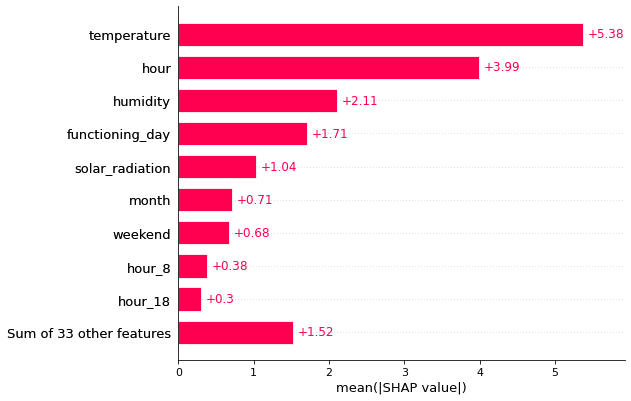

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values)

A mean SHAP plot is yet another approach to aggregating the values. We find the mean of all observations' absolute SHAP values for each feature. We accept the outright qualities as we don't maintain that positive and negative qualities should balance one another. The bar graph above is what we have at the end. We can see that the feature with the largest mean SHAP, shell weight, is represented by a single bar.

Positive and negative SHAP values for features with large mean SHAP values will typically be large. To put it another way, these are the characteristics that significantly influence the predictions made by the model. This plot can be used in the same way that a feature importance plot can be used. That is, to emphasize characteristics that are crucial to a model's predictions. The fact that it reveals nothing about the nature of the relationship between the target variable and features is a problem.

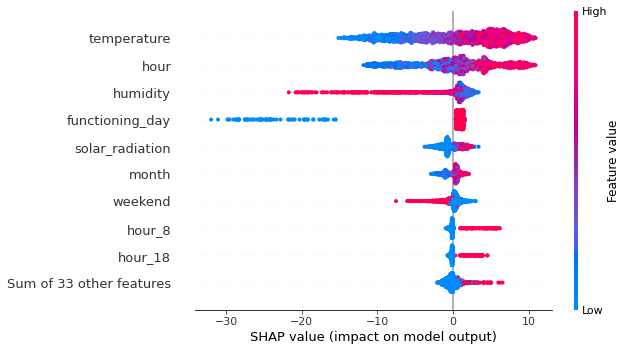

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

The beeswarm plot is our final grouping. As found in Figure, this is a plot of all the SHAP values. The y-axis features are used to group the values. For each gathering, the shade the not entirely settled by the worth of a similar element (for example higher element values are redder). The mean SHAP values determine the order of the features.

Some of the problems from the previous plots are addressed in this one. Dissimilar to the choice plot, we can plot every one of the perceptions yet has clear translations. It can be used to emphasize important relationships, like mean SHAP. We can also begin to comprehend these relationships' nature. Take, for instance, Day_1call_duration, where you can see that the SHAP values rise in tandem with the feature value.

##**9. Summary and Conclusion**

#### **Summary**

We began our analysis by performing EDA on all of our datasets. First, we looked at and changed our dependent variable, "Rental Bike Count." After that, we looked at categorical variables and eliminated those that represented the majority of one class. We also looked at numerical variables and discovered their correlation, distribution, and connection to the dependent variable. Additionally, we hot-encoded the categorical variables and removed some numerical features that primarily had 0 values.

Following that, we examine several well-known individual models, ranging from straightforward ensemble models like Random Forest and Gradient Boost to more complex ones like the Linear Regressor and Regularization Models (Ridge and Lasso). A single, unified model for working and nonworking days was also one of the few model formulation options tested.

Linear Regression, Lasso, Ridge, Elastic net, Decision Tree, Random Forest, and XGBoost were the next eight machine learning algorithms we used. To enhance the performance of our model, we performed hyperparameter tuning.

####**Conclusion**

1. Here are some solutions to manage Bike Sharing Demand ⏬

* Create a portfolio of regular customers.
* The majority of rentals are for daily commutes to workplaces and colleges. Therefore open additional stations near these landmarks to reach their primary customers.
* While planning for extra bikes to stations the peak rental hours must be considered, i.e. 7–9 am and 5–6 pm.
* Start a new renting program for premium customers to increase business.
* Utilize the ML model to cater to demand efficiently.
* Be ready for 2 kinds of patterns in demand which are for a working day and a non- working day.
*  Maintenance activities for bikes should be done at night due to low usage of bikes during the night time. Removing some bikes from the streets at night time will not cause trouble for the customers.
* Try to get the bookings as early as possible to manage the demand.
* May start giving discounts to bookings if they book bike in advance.
* Be proactive with communication. Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problems with the service.
* Lean into the best customers.
* Solving Poor Network Connectivity Issues.
* Define a roadmap for new customers.
* Stay competitive.

2. We see 2 rental patterns across the day in bike rentals count - first for a Working Day where the rental count is high at peak office hours (8 am and 5 pm) and the second for a Non-working day where the rental count is more or less uniform across the day with a peak at around noon.
3. Hour of the day: Bike rental count is mostly correlated with the time of the day. As indicated above, the count reaches a high point during peak hours on a working day and is mostly uniform during the day on a non-working day.
4. Temperature: People generally prefer to bike at moderate to high temperatures. We see the highest rental counts between 32 to 36 degrees Celcius
5. Season: We see the highest number of bike rentals in the Spring (July to September) and Summer (April to June) Seasons and the lowest in the Winter (January to March) season.
6. Weather: As one would expect, we see the highest number of bike rentals on a clear day and the lowest on a snowy or rainy day
7. Humidity: With increasing humidity, we see a decrease in the bike rental count.
8. I have chosen the Random Forest model which is above all else I want better expectations for the rented_bike_count and time isn't compelling here. As a result, various linear models, decision trees, Random Forests, and Gradient Boost techniques were used to improve accuracy. I compared R2 metrics to choose a model.
9. No overfitting is seen in our model.
10. Due to less no. of data in the dataset, the training R2 score is around 99% and the test R2 score is 92%. Once we get more data we can retrain our algorithm for better performance.

#### **Way Forward**

However, this is not the ultimate end. As this data is time dependent, the values for variables like temperature, windspeed, solar radiation etc., will not always be consistent. Therefore, there will be scenarios where the model might not perform well. As Machine learning is an exponentially evolving field, we will have to be prepared for all contingencies and also keep checking our model from time to time. Therefore, having a quality knowledge and keeping pace with the ever evolving ML field would surely help one to stay a step ahead in future.

### ***Hurrah! We have successfully completed our Machine Learning Capstone Project !!!***